<img src="C:/Users/maxwe/Desktop/Diabetes_img.jpg" alt="Diabetes Image"/>

# Part A: Business and Data Understanding

## Business Understanding
**Stark Health Clinic is a leading healthcare provider that leverages technology and predictive modeling to enhance its operations. By integrating machine learning into its systems, the clinic identifies diseases early, improving patient outcomes and resource allocation.**

### Problem Definition

**Stark Health Clinic faces a significant challenge in accurately identifying patients at risk of developing diabetes. This challenge results in suboptimal early detection and prevention strategies, which can have serious consequences for patient health and well-being.**

### Rationale of the project
**The current approach to identifying at-risk patients lacks precision, leading to missed opportunities for timely interventions. This can result in compromised patient outcomes and increased healthcare costs. The clinic's inability to accurately identify high-risk patients hinders its ability to provide proactive care and effective disease management.**

### Objective
**By harnessing the power of advanced machine learning techniques, this project aims to develop a robust predictive model that accurately identifies high-risk patients. This model will enable proactive healthcare interventions, improving patient outcomes and reducing the economic burden of diabetes. Additionally, the project will enhance the clinic's reputation for innovative, data-driven care, positioning it as a leader in the healthcare industry.**

### Data Colletion
**The dataset used for this project is "Diabetics Prediction Dataset" made available by 10Alytics**

### Project Workflow
- **A. Business and Data Understanding**

- **B. Perform Exploratory Data Analysis in Python:**
- **1) Visualize relationships between the target and some key features**
- **2) Explore correlations**
- **3) Conduct univariate, bivariate, and multivariate analysis as much as is feasible**

- **C. Perform Feature Engineering:**
- **1) Encoding categorical variables**
- **2) Create new features from existing features where necessary, depending on insights from your EDA**

- **D. Model Selection, Training and Validation:**
- **1) Train and test at least 3 supervised learning models**

- **E. Model Evaluation:**
- **1) Analyze the results of your trained models**
- **2a) Identify the most important evalution metrics for this work.**
- **2b) Investigate the effect of false negatives or true positives on delivering better result for a business**

### Step 1: Import necessary libraries

In [5]:
#Neessary libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

from mlxtend.plotting import plot_decision_regions
from skimpy import skim
import missingno as msno
from pandas.plotting import scatter_matrix

#libraries for modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

#libraries for evaluation
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report, roc_auc_score

import gc  # garbage collection
import warnings  # or warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Step 2: Load and Read the dataset

In [7]:
#Load and read the dataset
df = pd.read_csv('Downloads/diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


### Step 3: Understanding the Data structure

In [9]:
#Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


The dataset contains the following columns:
- **gender**: Gender of the patients: female, male, other
- **age**: Age of the patient
- **hypertension**: Hypertension status of the patient
- **heart_diesease**: Heart disease in patient if any
- **smoking_history**: Smoking history of the patient
- **bmi**: Body Mass Index (BMI) of patient
- **HbA1c_level**: Hemoglobin A1c (HbA1c) level of the patient, measures average blood glucose over previous 3 months
- **blood_glucose_level**: Blood Glucose Level
- **diabetes**: Dibabetes status of the patient

In [11]:
#Shape of the data
print(f' There are {df.shape[0]} features and {df.shape[1]} obsevations')

 There are 100000 features and 9 obsevations


In [12]:
#Understand data types
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [13]:
#Checking columns
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

### Step 4: Data Cleaning

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


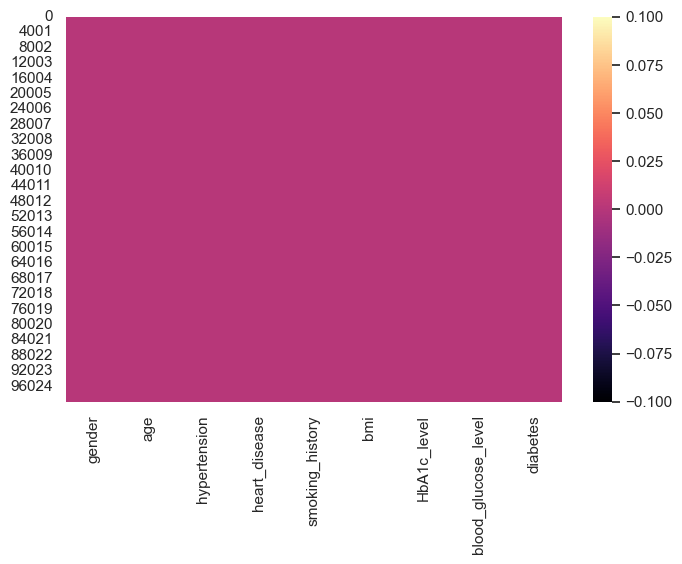

In [15]:
#Checking for missing values
print(df.isnull().sum())

#Visualise the data for any missing values
plt.figure(figsize = (8,5))
sns.heatmap(df.isnull(), cbar = True, cmap = "magma")
plt.show();

In [16]:
# Find and address duplicates if any

duplicate_count = df.duplicated().sum()

# Confirm and handle duplicates
if duplicate_count > 0:
    print(f"Number of duplicates found: {duplicate_count}")
    
    # Remove duplicates
    df = df.drop_duplicates()
    print("Duplicates have been removed.")
    
    # Confirm the new shape of the DataFrame
    new_shape = df.shape
    print(f"New shape of the DataFrame without duplicates: {new_shape}")
else:
    print("No duplicates found.")

Number of duplicates found: 3854
Duplicates have been removed.
New shape of the DataFrame without duplicates: (96146, 9)


In [17]:
#Correct data type: convert age columns into correct data type (int)
df["age"] = df["age"].astype(int)

In [18]:
#Checking unique values
df.nunique()

gender                    3
age                      81
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64

In [19]:
# Descriptive Statistics - to show numerical features summary statistics
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.783756,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.482208,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.000000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


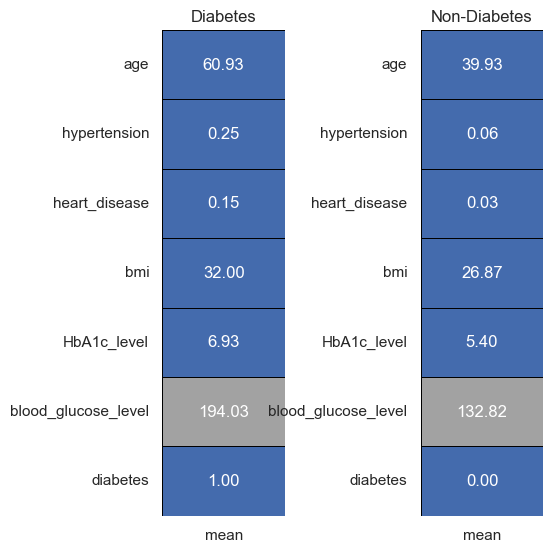

In [20]:
colors = ['#446BAD','#A2A2A2']

diabetics = df[df['diabetes'] == 1].describe().T
non_diabetics = df[df['diabetes'] == 0].describe().T

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(diabetics[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Diabetes');

plt.subplot(1,2,2)
sns.heatmap(non_diabetics[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('Non-Diabetes');

fig.tight_layout(pad = -1)
plt.show()

- **Mean values of all the features for cases of diabetes and non-daibetes.**
- Mean **Age** values for cases of diabetes is 60.93 whereas that for non-diabetes cases is 39.93.
- There is no significant difference in the average values of **hypertension** and **heart disease** between diabetes and non-diabetes cases.
Average hypertenion and heart disease is slightly higher in diabetes cases, 0.25 and 0.15, than non-diabetes cases, 0.06 and 0.03 values respectively.
- **BMI** feature has higher values for diabetes cases than non-diabetes cases with 32.00 and 26.87 values respectively.
- Average **HbA1c level** detected for diabetes and non-diabetes cases is 6.95 and 5.40 respectively.
- Just like HbA1c level, average **blood glucose level** values for diabetes cases, 194.03, is more than those found in non-diabetes cases, 132.82. This feature can form as a good indicator to predict the cases of diabetes.
- From these mean values, we can conclude that certain features show a distinct difference between diabetes cases and non-diabetes cases. However, other features may need further analysis to clarify their relationship with the target variable.

# Part B: Perform Exploratory Data Analysis

In [23]:
#Identify and classify numerical and categorical features

# Initialize lists to hold column names
numerical_cols = []
categorical_cols = []

# Loop through the columns to categorize them
for column in df.columns:
    if df[column].dtype == 'object':
        categorical_cols.append(column)
    else:
        numerical_cols.append(column)

#Display the results
print(f"Categorical features : ", categorical_cols)
print(f"Numerical features: ", numerical_cols)

Categorical features :  ['gender', 'smoking_history']
Numerical features:  ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']


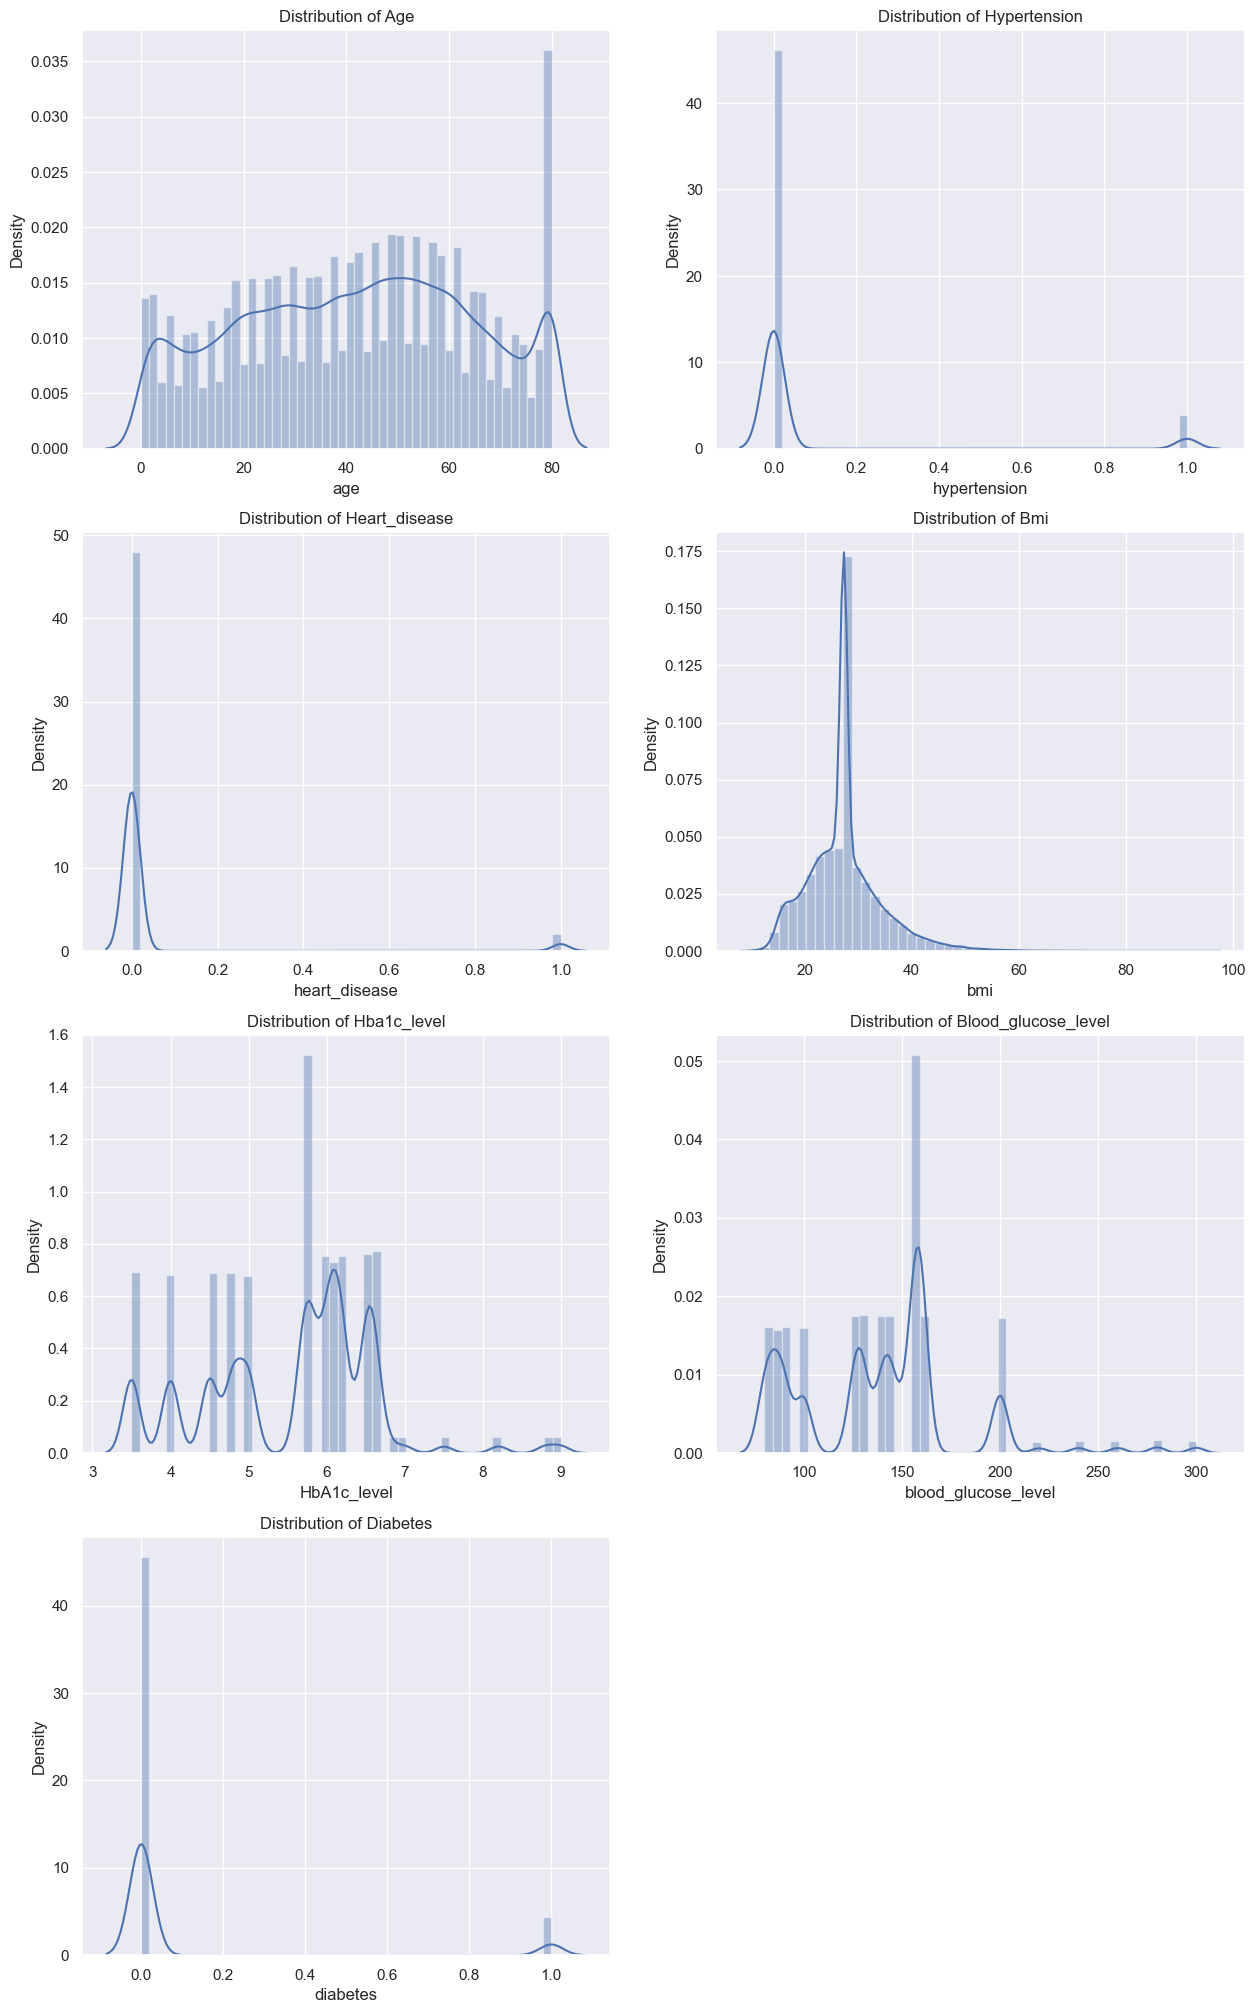

In [24]:
#Distribution of numerical features

fig, ax = plt.subplots(nrows = 4,ncols = 2,figsize = (15,25))

#calculate the number of numrical features
n = len(numerical_cols)

# Flatten the axes for easier indexing
ax = ax.flatten()

for i in range(n):
    plt.subplot(4,2,i+1)
    sns.distplot(df[numerical_cols[i]])
    title = 'Distribution of ' + numerical_cols[i].capitalize()
    plt.title(title)

# Remove unused subplots
for j in range(n, len(ax)):
    fig.delaxes(ax[j])  # Delete unused axes

plt.show();

- **Hypertension, heart disease**, and **diabetes** are seen to have normal distribution.
- **HbA1c level** and **Blood glucose level** have bimodal distribution.
- **Age** display a bimodal data distribution.
- **BMI** has a right-skewed unimodal distribution.

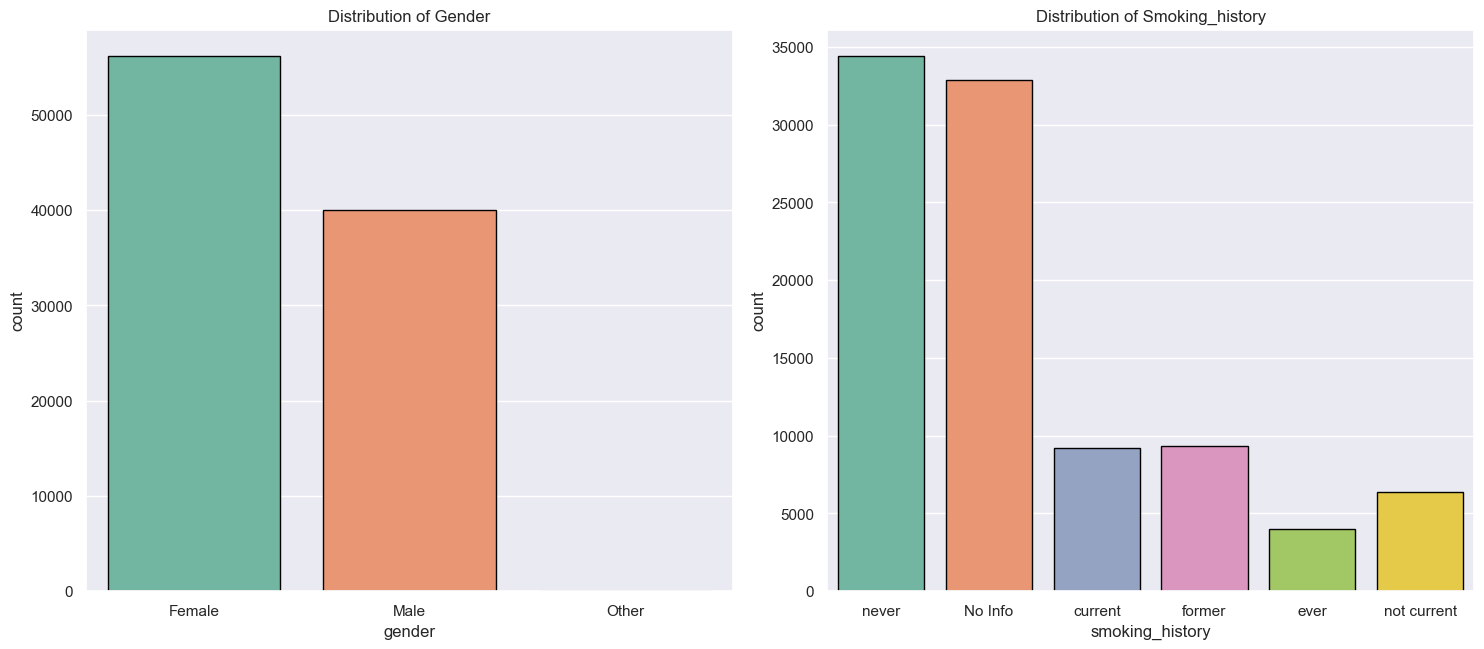

In [26]:
# Create the figure and axes
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(15, 25))

# Calculate the number of categorical features
n = len(categorical_cols)

# Flatten the axes for easier indexing
ax = ax.flatten()

# Loop through each categorical column
for i in range(n):
    plt.subplot(4, 2, i + 1)
    sns.countplot(x=categorical_cols[i], data=df, palette='Set2', edgecolor='black')
    title = 'Distribution of ' + categorical_cols[i].capitalize()
    plt.title(title)

# Remove unused subplots
for j in range(n, len(ax)):
    fig.delaxes(ax[j])  # Delete unused axes

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

### Visualise the target feature

diabetes
0    87664
1     8482
Name: count, dtype: int64


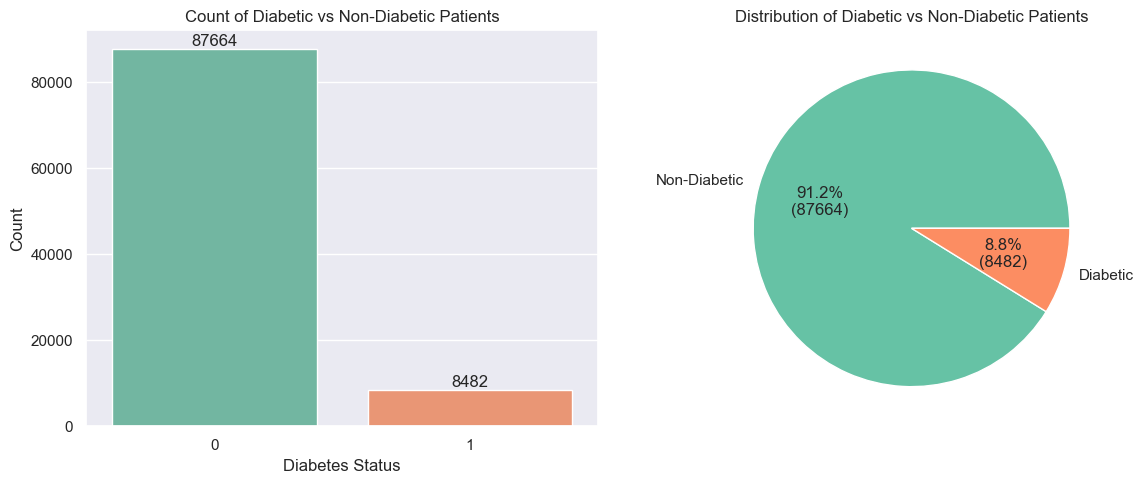

In [28]:
#Display the target feature 'diabetes'

# Display the value counts for diabetes
print(df["diabetes"].value_counts())

# Create subplots for the count plot and pie chart
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Count plot for diabetes status
ax1 = sns.countplot(x=df["diabetes"], order=df["diabetes"].value_counts(ascending=False).index, palette="Set2", ax=axes[0])
values = df["diabetes"].value_counts(ascending=False).values

# Adding labels to the bar plot
for i, container in enumerate(ax1.containers):
    ax1.bar_label(container, labels=[values[i]])

ax1.set_title('Count of Diabetic vs Non-Diabetic Patients')
ax1.set_xlabel('Diabetes Status')
ax1.set_ylabel('Count')

# Pie chart for diabetes status
diabetes_count = df['diabetes'].value_counts()
total = len(df['diabetes'])
diabetes_lab = df['diabetes'].value_counts().index

# Function to format pie chart labels
def distrb(x):
    return '{:.1f}%\n({:.0f})'.format(x, total * x / 100)

axes[1].pie(diabetes_count, labels=diabetes_lab.map({0: 'Non-Diabetic', 1: 'Diabetic'}), autopct=distrb, colors=['#66c2a5', '#fc8d62'])
axes[1].set_title('Distribution of Diabetic vs Non-Diabetic Patients')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

- The dataset is **unbalanced** with **92.2%** and **8.8%** for **Non-Diabetes** and **Diabetes** cases respectively.
- This will result to **biase towards Non-Diabetes** cases.

### Step 1) Visualize relationships between the target 'diabetes' and some key features

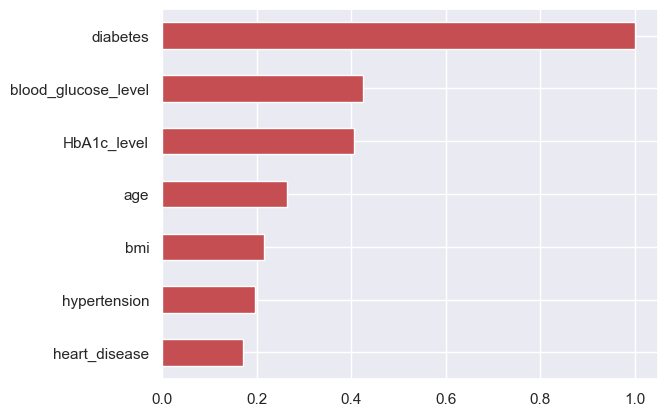

In [31]:
#To get some key features, correlation will be used
df_corr_matrix = df[numerical_cols].corr()
df_corr_matrix["diabetes"].sort_values(ascending=True)
F_imp = df_corr_matrix["diabetes"].sort_values(ascending=True)
F_imp.plot.barh(color = 'r')
plt.show();

- Observation: To get key features, we used correlation and focused on the numerical features. **Blood_glucose_level** had the higehst relevanze followed by **HbA1c_level**, far-followed by **age**, **bmi** and **heart-disease** having the least correlation with diabetes. These key features will be visualized below.

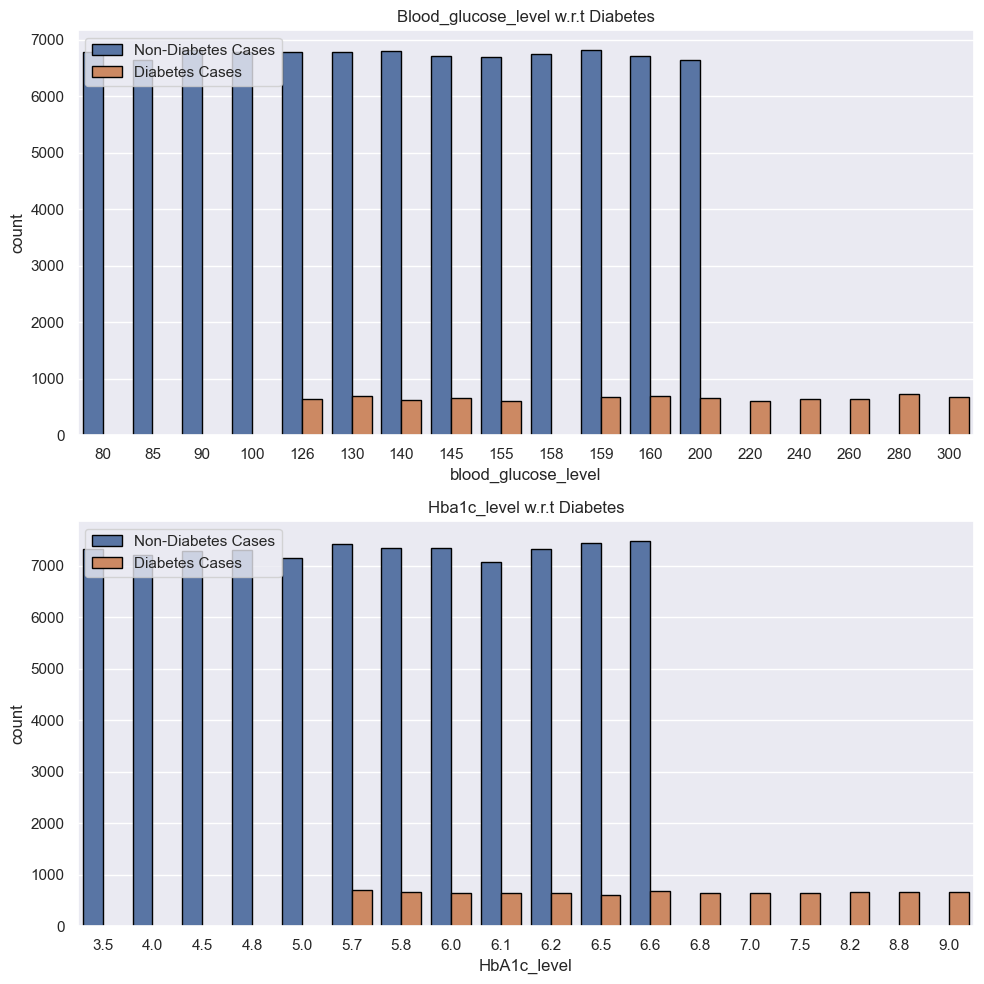

In [33]:
#Visualize 'blood_glucose_level', 'HbA1c_level' and the target feature 'diabetes'

#Define the specific numerical columns you want to display
feat = ['blood_glucose_level', 'HbA1c_level']

# Calculate the number of numerical features
n = len(feat)

# Create subplots with a dynamic number of rows
fig, ax = plt.subplots(nrows=n, ncols=1, figsize=(10, 10))

# Loop through each numerical column
for i in range(n):
    sns.countplot(x=feat[i], data=df, hue="diabetes", edgecolor='black', ax=ax[i])
    
    # Add legend and title
    ax[i].legend(['Non-Diabetes Cases', 'Diabetes Cases'], loc='upper left')
    title = f'{feat[i].capitalize()} w.r.t Diabetes'
    ax[i].set_title(title)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

This plot is a set of histograms showing the distribution of blood glucose level and also the distribution of HbA1c level as they relate to diabetes. Each subplot represents each of these distributions:

Blood glucose level: The distribution of blood glucose level with respect to diabetes status shows a higher concentration of diabetes around higher glucose levels (approximately 126 to 300 mg/dL), suggesting that many patients may have higher-than-normal glucose levels, which is a common indicator of diabetes.

HbA1c level: The average blood glucose level (HbA1c level) distribution have the presence of diabetes starting from 5.7% to 9.0%.

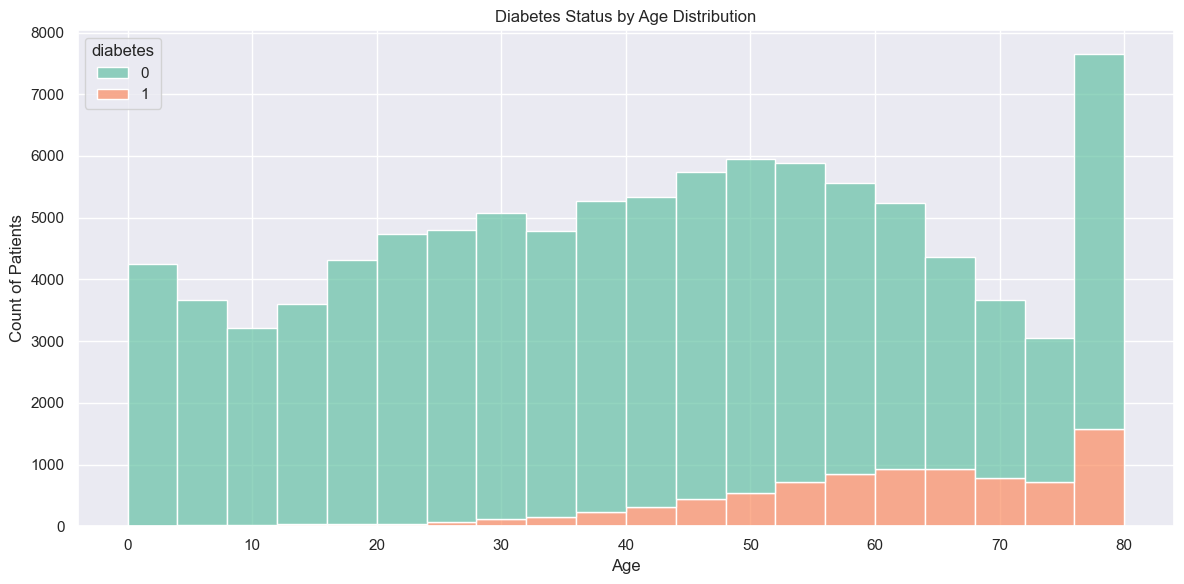

Diabetes Status 1 starts at age: 3
Diabetes Status 1 ends at age: 80


In [35]:
# Visualize diabetes status by age distribution using histogram
plt.figure(figsize=(12, 6))
hist_plot = sns.histplot(data=df, x='age', hue='diabetes', multiple='stack', bins=20, palette='Set2', alpha=0.7)

# Set the title and labels for the histogram
plt.title('Diabetes Status by Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count of Patients')

plt.tight_layout()
plt.show()

# Calculate minimum and maximum ages for individuals with diabetes status 1
diabetes_start_age = df[df['diabetes'] == 1]['age'].min()
diabetes_end_age = df[df['diabetes'] == 1]['age'].max()

# Print the start and end values
print(f'Diabetes Status 1 starts at age: {diabetes_start_age}')
print(f'Diabetes Status 1 ends at age: {diabetes_end_age}')



- Observation: Patients with diabetes started from age 3 to age 80. But signifiantly, it was observed that diabetes increased with age as patients from age 24 to 80 were more subceptible to have diabetes.

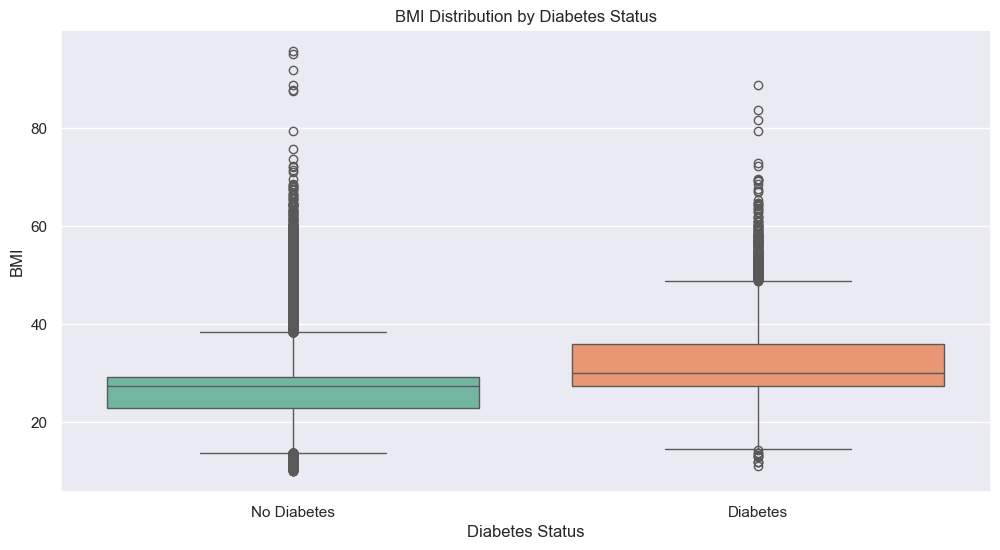

   diabetes    min       mean    max
0         0  10.01  26.869003  95.69
1         1  10.98  31.997755  88.72

Observation: The BMI range susceptible to having diabetes is from 10.98 to 88.72.


In [37]:
# Visualize 'bmi' distribution by diabetes status using a boxplot

plt.figure(figsize=(12, 6))
sns.boxplot(x='diabetes', y='bmi', data=df, palette='Set2')
plt.title('BMI Distribution by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('BMI')
plt.xticks(ticks=[0, 1], labels=['No Diabetes', 'Diabetes'])
plt.show()

# Calculate statistics for each diabetes status
bmi_stats = df.groupby('diabetes')['bmi'].agg(['min', 'mean', 'max']).reset_index()

# Print the statistics
print(bmi_stats)

# Analyze the BMI ranges
bmi_diabetes_range = df[df['diabetes'] == 1]['bmi']
bmi_no_diabetes_range = df[df['diabetes'] == 0]['bmi']

# Print the BMI range susceptible to diabetes
# Format the output to access min and max values from bmi_stats
min_bmi_diabetes = bmi_stats[bmi_stats['diabetes'] == 1]['min'].values[0]
max_bmi_diabetes = bmi_stats[bmi_stats['diabetes'] == 1]['max'].values[0]

print(f'\nObservation: The BMI range susceptible to having diabetes is from {min_bmi_diabetes:.2f} to {max_bmi_diabetes:.2f}.')

### Step 2: Explore Correlation
Correlation is used to find pairwise relationship between numerical features

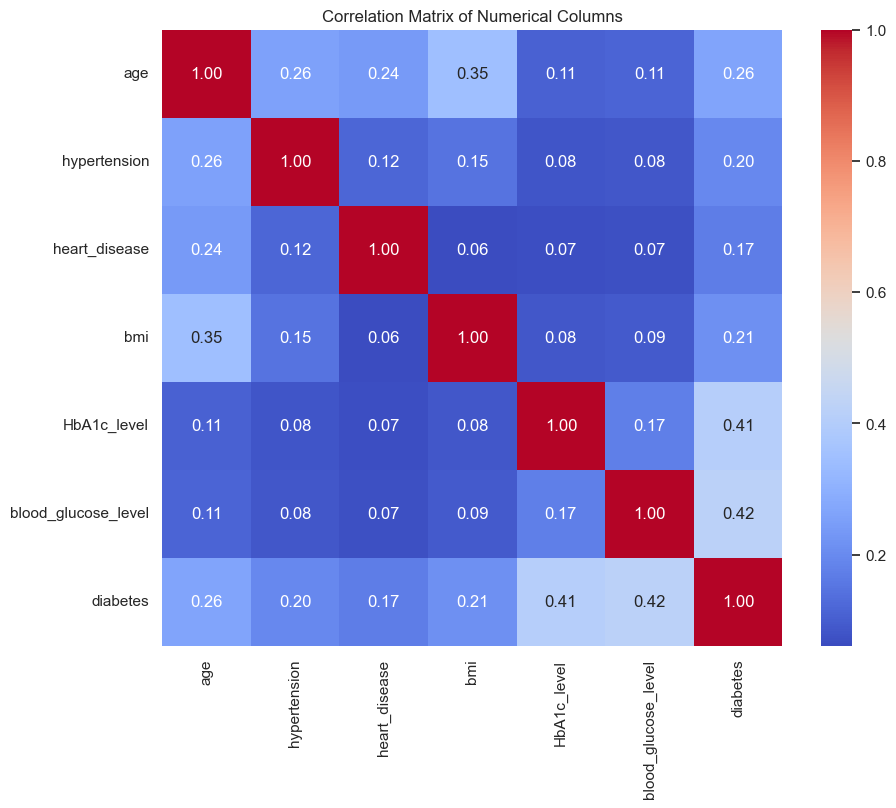

In [39]:
# Correlation matrix of numerical values
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

- **Correlation**: The heatmap shows the correlation between the numerical features: age, hypeternsion, heart disease, bmi, HbA1c_level, blood_glucose_level and diabetes. Correlation is measured using the Pearson correlation coefficient, which ranges from -1 to 1. A coefficient of 1 signifies a perfect positive correlation, -1 denotes a perfect negative correlation, and 0 indicates the absence of a linear correlation between the variables.

- **Observations**: The correlation matrix above shows weak correlation between features. 

- Blood glucose level vs Diabetes (0.42): The correlation between blood gluose level and the target feature 'diabetes' is strong and positive. This suggests that as blood glucose level, the likelihood of being diabetic is high.

- HbA1C level vs Diabetes (0.41): Similarly, HbA1c level has positive and high correlation with diabetes. This also suggests an increase HbA1c level increases the chances of having diabetes.  The correlation between blood gluose level and diabetes is strong and positive. This suggests that as blood glucose level increases, same is the likelihood of being diabetic increase.

- Age vs BMI (0.35): There is a moderate positive correlation between age and BMI, indicating that as age increases, BMI tends to increase as well. However, this correlation is not very strong, suggesting that other factors also influence BMI.

- Age vs hypertension (0.26): The correlation between Age and hypertension is weak and positive. This suggests an increase in having hypertension as one increase in age.

- Age vs heart disease (0.24): Similarly to hypertension, age and heart disease shows a weak positive correlation, but a slight relationship.

- BMI vs Diabetes (0.21): The correlation between BMI and diabetes is weak and positive, similar to the correlation with Age. This implies that BMI may have a slight influence on diabetes, but again, this relationship is very slight.

- Hypertension vs Diabetes (0.20): Similarly to bmi, hypertension shows a weak positive correlation. This suggests a less dominant factor on diabetes.

- HbA1c_level vs Blood Glucose Level (0.17): This show a weak positive correlation, suggesting that as HbA1c levels increase, blood glucose levels tend to increase as well. While this correlation is not strong, it makes clinical sense as both levels are related to glycemic control.

- Heart diesease vs Diabetes (0.17): Similarly to the above, this shows a weak positive correlation, suggesting that relationship between heart disease and diabetes is similar to that of the glycemic control indicator.

- BMI vs hypertension (0.15): The correlation between bmi and hypertension is weak and positive correlation. It suggests t hat bmi has more influence on diabetes than on hypertension.

- Age vs Blood glucose level, Age vs HbA1c_level (0.11): The correlation between age and blood glucose level, and also the correlation between age and HbA1c level are weak and but positive. This suggests that as age increases, there may be a small increase in blood glucose level and HbA1c level, but this relationship is very slight and not a dominant factor.

- BMI vs Blood Glucose Level (0.08): The correlation between BMI and blood glucose level is weak and positive, similar to the correlation with HbA1c. This implies that BMI may have a slight influence on glucose levels, but again, this relationship is very slight.

- BMI vs heart disease (0.06): The correlation between BMI and HbA1c level is very weak and positive. It has the least correlation in the heatmap. This implies that these features have no dominant influence on each other.This suggests that body mass index has little influence on HbA1c levels.

In summary, the correlation of the features is generally weak, showing that none of these variables are strongly associated with each other in a linear fashion. This further suggests that other factors not considered here may be strongly influencing these variables.

The weak relationships between age, bmi, blood glucose level, HbA1c level, hypertension are expected to be true as the may be influenced by gene, environmental, behaviour or combination of these.

The weak correlation among these variables implies that, in predicting or analyzing conditions such as diabetes, it may be important to use additional factors and more complex models that can effectively capture nonlinear relationships.

### Step 3: Univariate, Bivariate, and Multivariate Analysis

#### 1. Univariate Analysis: Analyze the distribution of each feature.

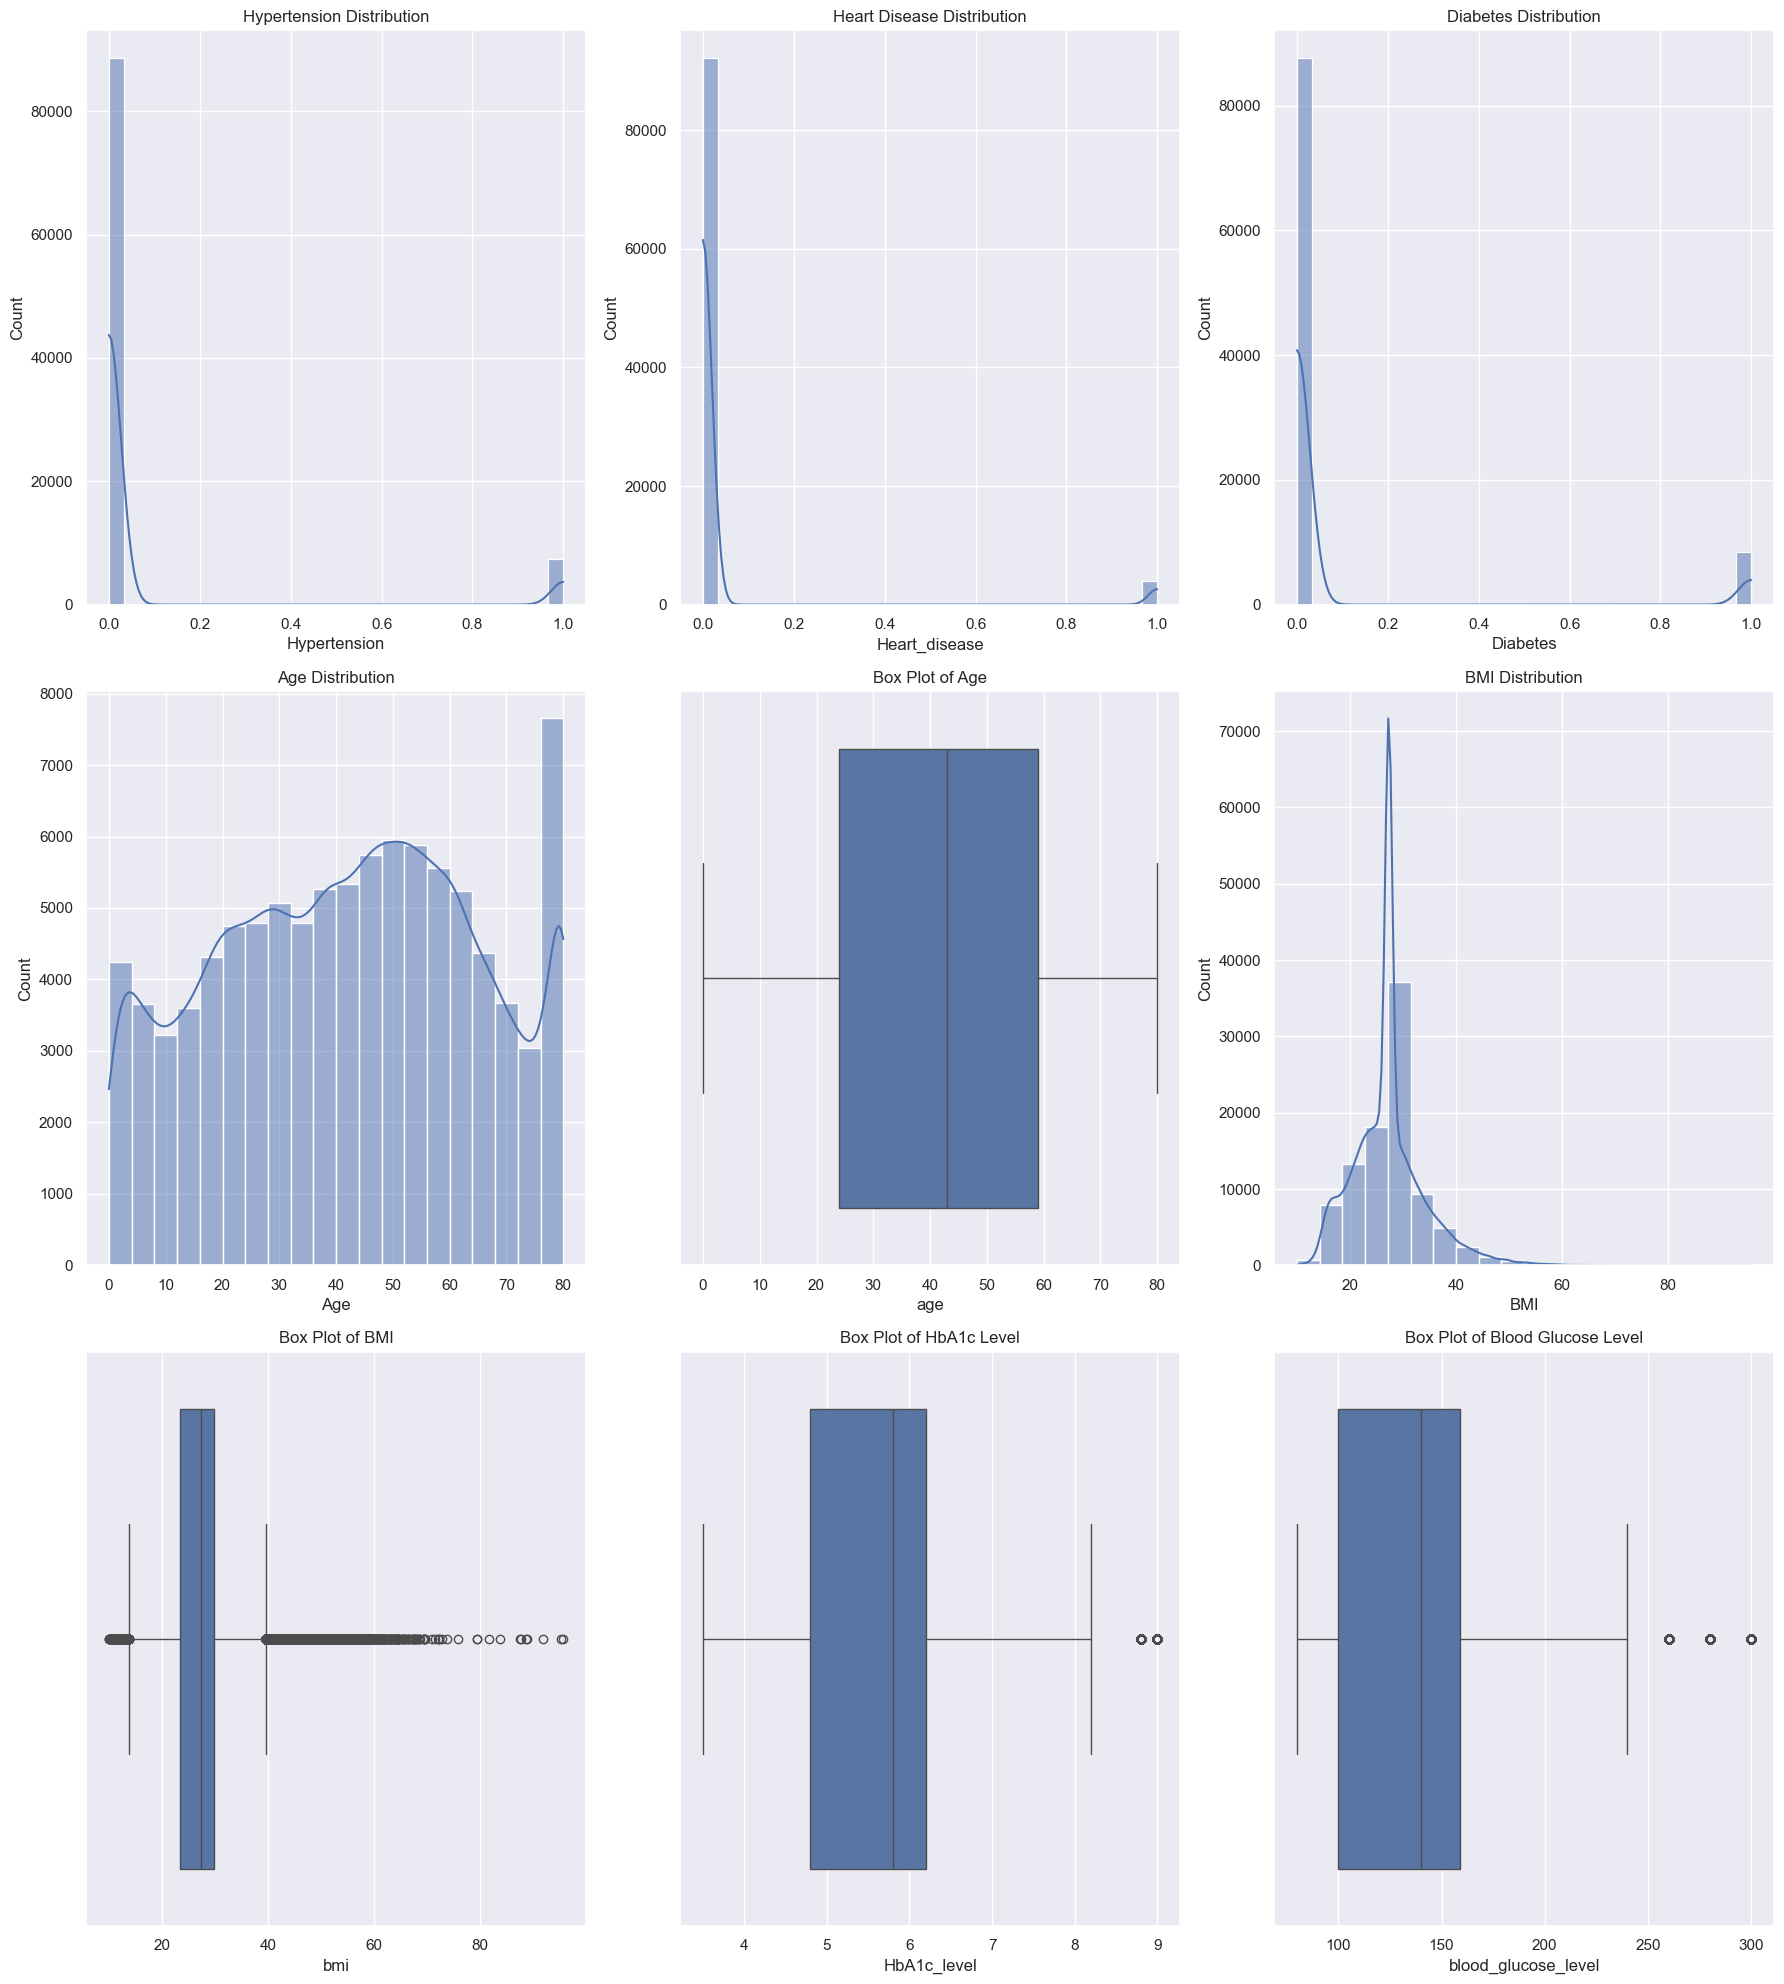

In [43]:
# Create a grid of subplots with 3 rows and 3 columns for numerical features
fig, axes = plt.subplots(3, 3, figsize=(18, 20))
plt.subplots_adjust(hspace=0.4)  # Adjust vertical space between plots

# List of numerical features and their titles
numerical_features = [
    ('hypertension', 'Hypertension Distribution'),
    ('heart_disease', 'Heart Disease Distribution'),
    ('diabetes', 'Diabetes Distribution'),
]

# Loop through the numerical features to create histograms
for i, (feature, title) in enumerate(numerical_features):
    ax = axes[i // 3, i % 3]  # Calculate row and column index
    sns.histplot(data=df, x=feature, ax=ax, bins=30, kde=True, palette='Set2')
    ax.set_title(title)
    ax.set_ylabel('Count')
    ax.set_xlabel(feature.capitalize())

# Add other numerical features with histograms and box plots
sns.histplot(df['age'], bins=20, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Age Distribution')
axes[1, 0].set_xlabel('Age')

sns.boxplot(x=df['age'], ax=axes[1, 1])
axes[1, 1].set_title('Box Plot of Age')

sns.histplot(df['bmi'], bins=20, kde=True, ax=axes[1, 2])
axes[1, 2].set_title('BMI Distribution')
axes[1, 2].set_xlabel('BMI')

sns.boxplot(x=df['bmi'], ax=axes[2, 0])
axes[2, 0].set_title('Box Plot of BMI')

sns.boxplot(x=df['HbA1c_level'], ax=axes[2, 1])
axes[2, 1].set_title('Box Plot of HbA1c Level')

sns.boxplot(x=df['blood_glucose_level'], ax=axes[2, 2])
axes[2, 2].set_title('Box Plot of Blood Glucose Level')

# Hide any unused subplots
for ax in axes.flat:
    if not ax.has_data():
        ax.axis('off')

# Show the plots
plt.tight_layout()
plt.show()

The histplot shows the distribution of the numerical features: heart disease, hypertension, diabetes, age, bmi and blood glucose level. It was observed that hypertension, heart disease and diabetes had 2 categories. The boxplot also displayed age, bmi, HbA1c level and blood glucose level to identify if there were any outliers. While age gave no outlier bmi, HbA1c level and blood glucose level displayed outliers and these features needs to be further investigated.

It may also be important to investigate other factors on medical conditions influenced by different feature groups

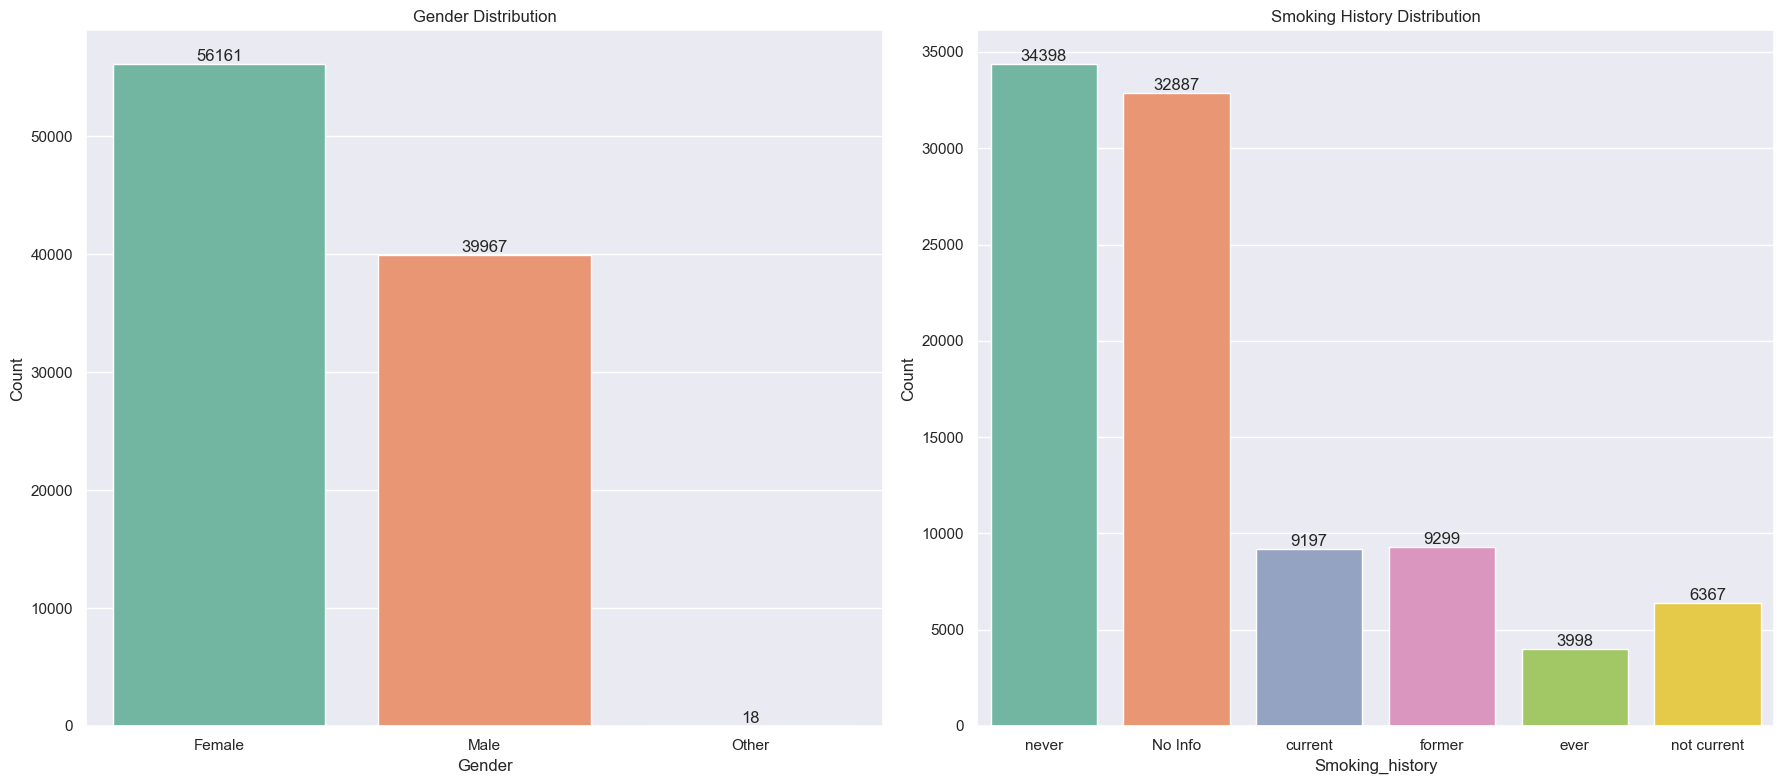

In [45]:
# Categorical features: Create a grid of subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(18, 8))  # Adjusted height for better clarity
plt.subplots_adjust(hspace=0.4)  # Adjust vertical space between plots

# List of categorical features and their titles
categorical_features = [
    ('gender', 'Gender Distribution'),
    ('smoking_history', 'Smoking History Distribution'),
]

# Loop through the features to create count plots
for i, (feature, title) in enumerate(categorical_features):
    ax = axes[i]  # Directly access the axes for a single row
    sns.countplot(x=feature, data=df, ax=ax, palette='Set2')
    ax.set_title(title)
    ax.set_ylabel('Count')
    ax.set_xlabel(feature.capitalize())

    # Add count labels as integers on top of bars
    for p in ax.patches:
        ax.annotate(int(p.get_height()), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

The countplot is used to display categorical features such as gender and smoking history. The gender feature has 3 categories namely Female, Male and other with 56161, 39967 and 18 counts respectively, and represented with different colored bars. Different colors distinguish between gender categories: Female (green), Male (orange), and Other (blue).

Similarly, the smoking history is visualized with a countplot with its bars representing the proportion of patients with diabetes within each smoking history category. The smoking history has 6 distinct types: never, no info, current, former, ever and not current with never having more counts and ever the least count.Interpretation: Higher Diabetes Rates in Former Smokers: The highest diabetes rate is observed among males who are former smokers (21%), which is significantly above the overall average.

#### Create new groups

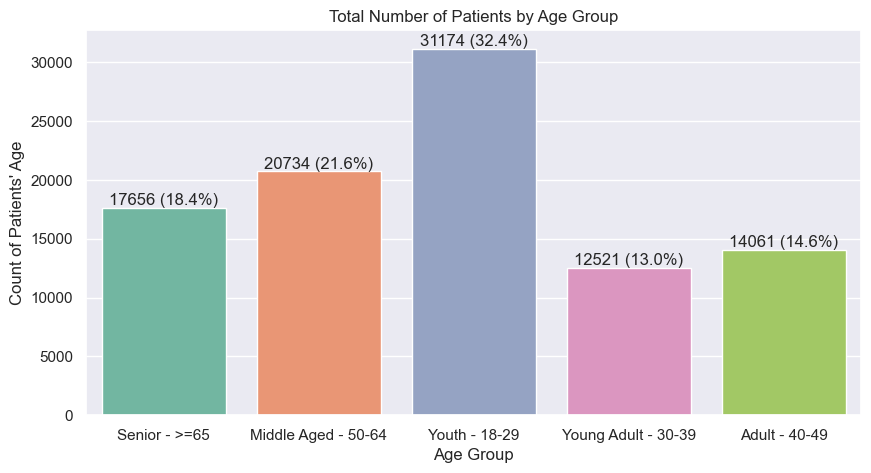

In [48]:
# Create Age groups and find their percentage

def age_group(age):
    if age < 30:
        return 'Youth - 18-29'
    elif age < 40:
        return 'Young Adult - 30-39'
    elif age < 50:
        return 'Adult - 40-49'
    elif age < 65:
        return 'Middle Aged - 50-64'
    else:
        return 'Senior - >=65'

df['age_group'] = df['age'].apply(age_group)

# Investigating the patients' Age group in categories
plt.figure(figsize=(10, 5))
palette = sns.color_palette("Set2", len(df['age_group'].unique()))  # Define a color palette

# Create count plot
ax = sns.countplot(x="age_group", data=df, palette=palette)

# Calculate total number of patients for percentage calculation
total_patients = len(df)

# Add count and percentage labels on top of each bar
for p in ax.patches:
    count = int(p.get_height())
    percentage = (count / total_patients) * 100  # Calculate percentage
    ax.annotate(f'{count} ({percentage:.1f}%)', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12)

plt.xlabel("Age Group")
plt.ylabel("Count of Patients' Age")
plt.title("Total Number of Patients by Age Group")
plt.show()

Observation: Age is grouped into 5 groups youth, young adult, adult, middled aged and seniors. While youth were the highest in number with 31174 count (32.4% of the group), young adults were the least with 12521.

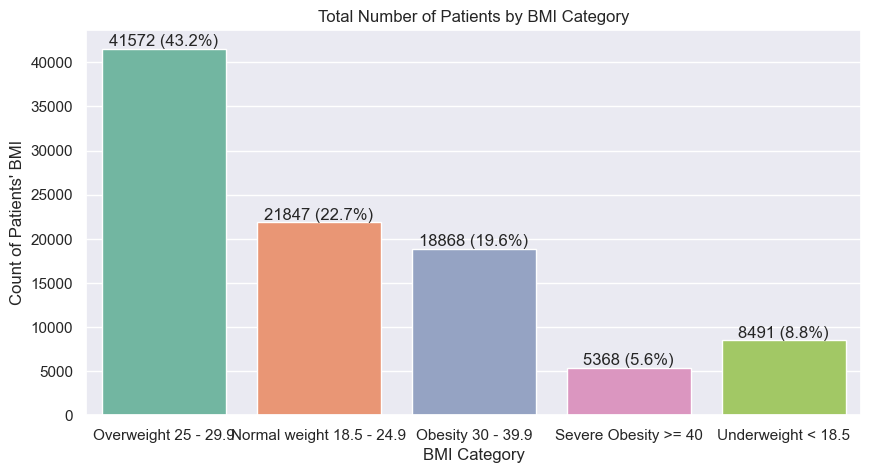

In [50]:
# Create BMI group and find their percentage proportions
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight < 18.5'
    elif 18.5 <= bmi <= 24.9:
        return 'Normal weight 18.5 - 24.9'
    elif 25 <= bmi <= 29.9:
        return 'Overweight 25 - 29.9'
    elif 30 <= bmi <= 39.9:
        return 'Obesity 30 - 39.9'
    else:
        return 'Severe Obesity >= 40'

df['bmi_category'] = df['bmi'].apply(bmi_category)

# Investigating the patients' BMI in categories
plt.figure(figsize=(10, 5))
palette = sns.color_palette("Set2", len(df['bmi_category'].unique()))  # Define a color palette

# Create count plot
ax = sns.countplot(x="bmi_category", data=df, palette=palette)

# Calculate total number of patients for percentage calculation
total_patients = len(df)

# Add count and percentage labels on top of each bar
for p in ax.patches:
    count = int(p.get_height())
    percentage = (count / total_patients) * 100  # Calculate percentage
    ax.annotate(f'{count} ({percentage:.1f}%)', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12)

plt.xlabel("BMI Category")
plt.ylabel("Count of Patients' BMI")
plt.title("Total Number of Patients by BMI Category")
plt.show()

Observation: Body Mass Index (BMi) were grouped into 5 categories in line with best clinical practice viz-a-viz: underweight (less than 18.5 bmi), normal weight (18.5 - 24.9), overweight (25 - 29.9), obesity (30 - 39.9) and severe obesity (>= 40). This indicates that most patients (43.2%) are overweight with few overweights.

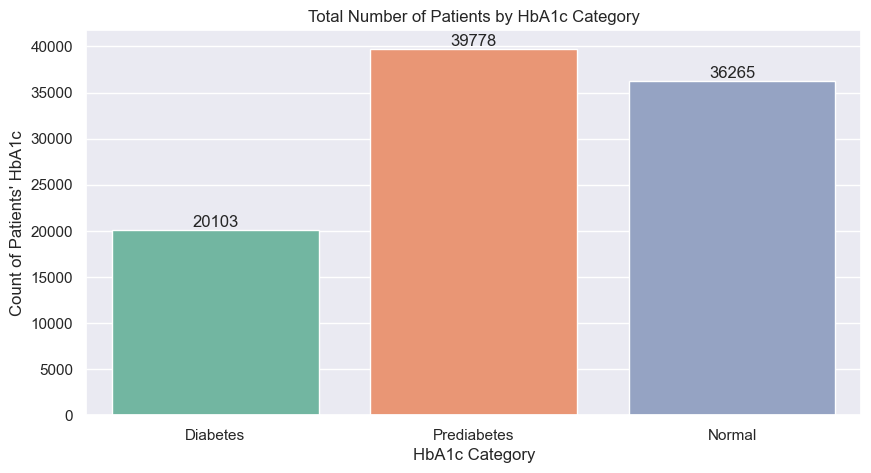

In [52]:
#HbA1c level categories - Categorizing HbA1c levels can help assess risk levels.

def HbA1c_category(HbA1c):
    if HbA1c < 5.7:
        return 'Normal'
    elif HbA1c < 6.4:
        return 'Prediabetes'
    else:
        return 'Diabetes'

df['HbA1c_category'] = df['HbA1c_level'].apply(HbA1c_category)

# Investigating the patients' BMI in categories
plt.figure(figsize=(10, 5))
palette = sns.color_palette("Set2", len(df['HbA1c_category'].unique()))  # Define a color palette

# Create count plot
ax = sns.countplot(x="HbA1c_category", data=df, palette=palette)

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(int(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12)

plt.xlabel("HbA1c Category")
plt.ylabel("Count of Patients' HbA1c")
plt.title("Total Number of Patients by HbA1c Category")
plt.show()

Observations: Prediabetic patients were the highest in number. This signifies patients were at high risk of diabetes.

#### 2. Bivariate Analysis: Analyze relationships between two features

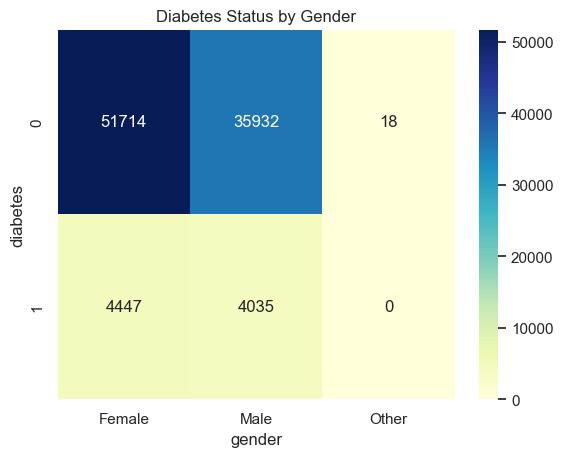

In [55]:
# Crosstab and heatmap
#Investigate relationship between diabetes and gender

crosstab = pd.crosstab(df['diabetes'], df['gender'])
sns.heatmap(crosstab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Diabetes Status by Gender')
plt.show();

Observation: There are more female patients than male patients. While this is true, in the context of the diabetics and non-diabetics ratio of females to males have the males in the highest number. That is their are more diabeteics present in every male than in females.

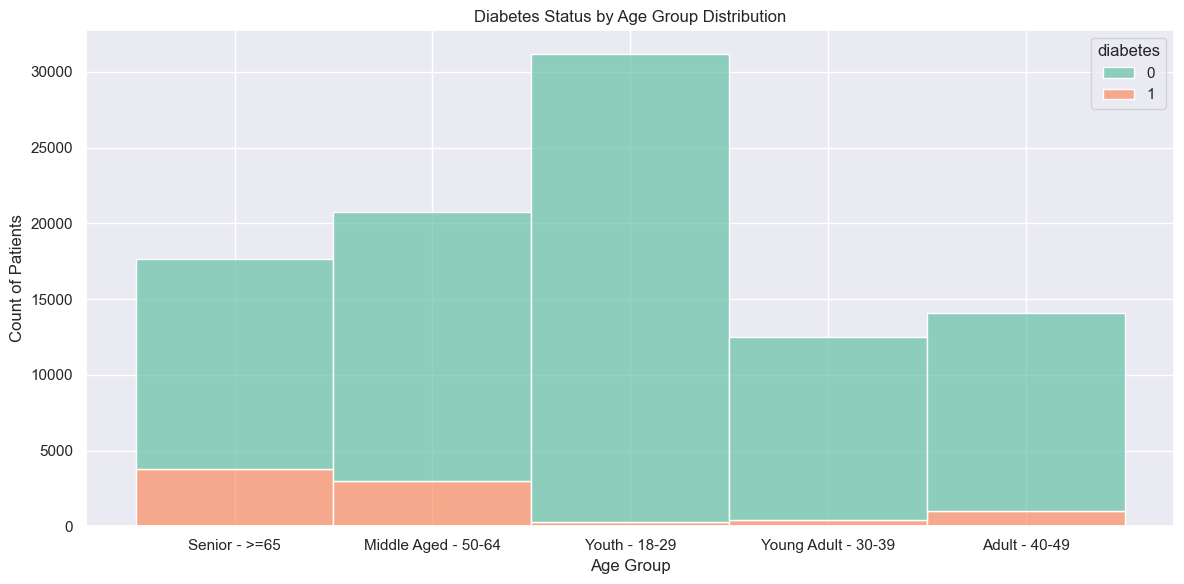

In [57]:
# Investigate diabetes status by age group distribution

plt.figure(figsize=(12, 6))
hist_plot = sns.histplot(data=df, x='age_group', hue='diabetes', multiple='stack', bins=20, palette='Set2', alpha=0.7)

# Set the title and labels for the histogram
plt.title('Diabetes Status by Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count of Patients')
plt.tight_layout()
plt.show()

Observation: Age group senior has the highest diabetes patients followed by middled aged group and followed by adults. This indicates that diabetes increase with age, the higher the age the more diabetes risk level.

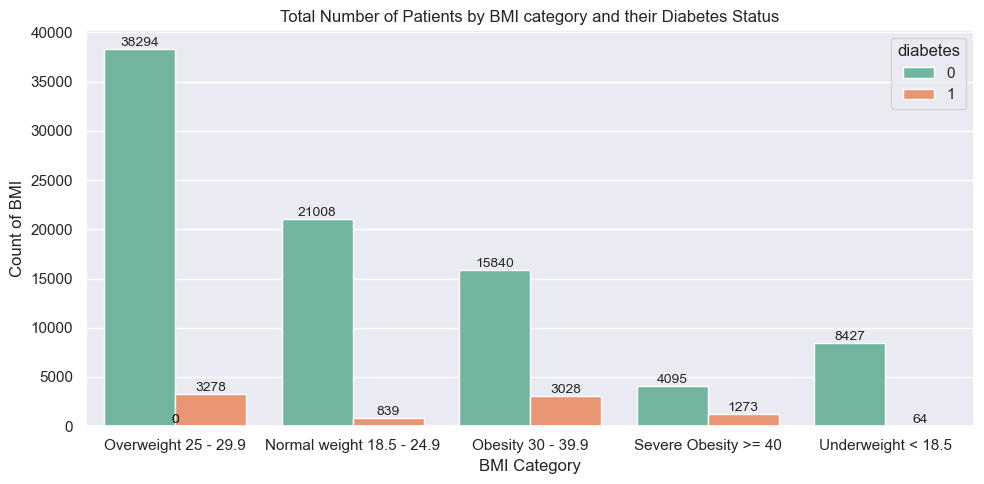

In [59]:
# Investigating the bmi category of patients by the target variable "diabetes"

plt.figure(figsize=(10, 5))
ax = sns.countplot(x="bmi_category", data=df, hue="diabetes", palette='Set2')

plt.xlabel("BMI Category")
plt.ylabel("Count of BMI")
plt.title("Total Number of Patients by BMI category and their Diabetes Status")

# Add count labels on top of each bar
for patch in ax.patches:
    # Get the height of each bar
    height = patch.get_height()
    # Get the x position for the label
    x_position = patch.get_x() + patch.get_width() / 2
    # Annotate the count above the bar
    ax.annotate(int(height), 
                (x_position, height), 
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

Observation: Diabetes is prevalent in patients who are overweight, obese and severely obese with bmi of over 25.

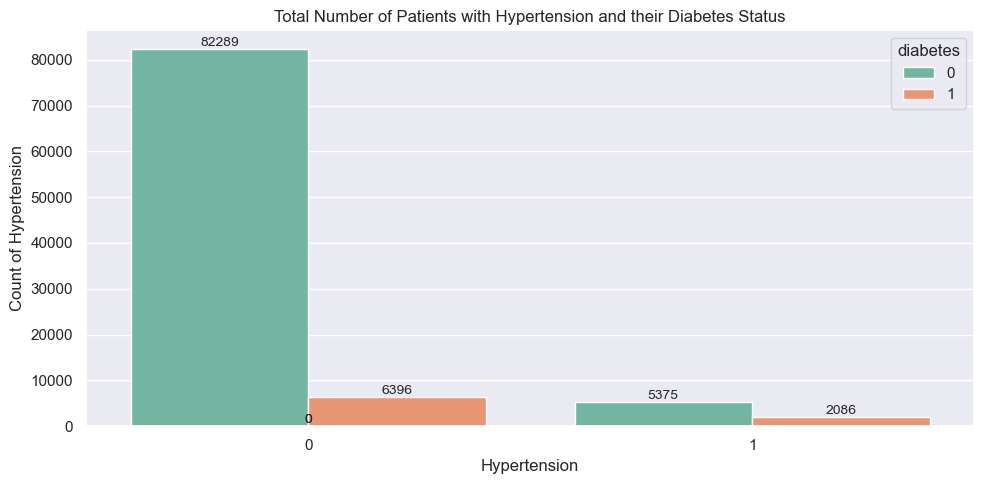

In [61]:
# Investigating patients hypertension status by the target variable "diabetes"

plt.figure(figsize=(10, 5))
ax = sns.countplot(x="hypertension", data=df, hue="diabetes", palette='Set2')

plt.xlabel("Hypertension")
plt.ylabel("Count of Hypertension")
plt.title("Total Number of Patients with Hypertension and their Diabetes Status")

# Add count labels on top of each bar
for patch in ax.patches:
    # Get the height of each bar
    height = patch.get_height()
    # Get the x position for the label
    x_position = patch.get_x() + patch.get_width() / 2
    # Annotate the count above the bar
    ax.annotate(int(height), 
                (x_position, height), 
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

Observation: The dataset has more non-hypertensive patients. But it is interesting to see that out of the few hypertensive patients more than 35% had diabetes, while out of the non-hypertensive patients less than 1% had diabetes. This suggest that hypertension may be associatedd with a higher prevalence of diabetes. This is significant as increased weight and insulin are fators which can triger nypertension and diabetes.

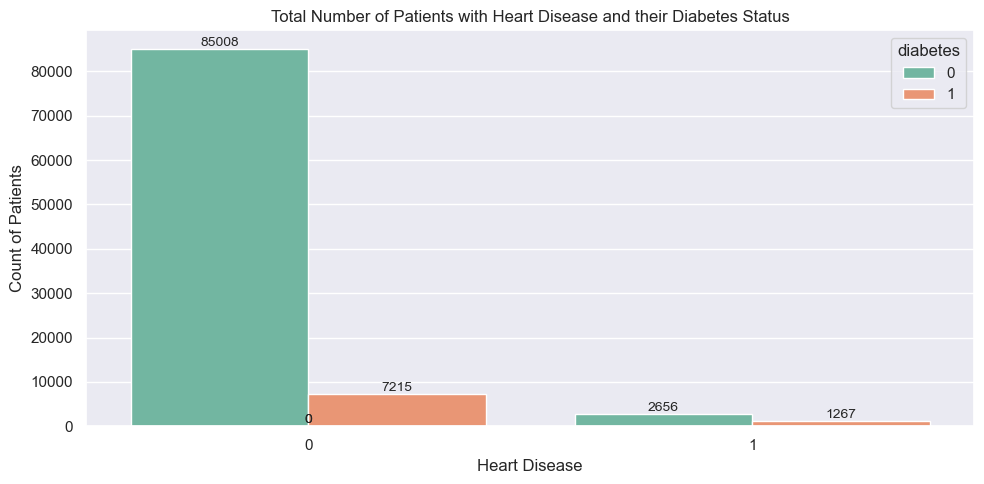

In [63]:
# Investigating patients heart disease by the target variable "diabetes"

plt.figure(figsize=(10, 5))
ax = sns.countplot(x="heart_disease", data=df, hue="diabetes", palette='Set2')

plt.xlabel("Heart Disease")
plt.ylabel("Count of Patients")
plt.title("Total Number of Patients with Heart Disease and their Diabetes Status")

# Add count labels on top of each bar
for patch in ax.patches:
    # Get the height of each bar
    height = patch.get_height()
    # Get the x position for the label
    x_position = patch.get_x() + patch.get_width() / 2
    # Annotate the count above the bar
    ax.annotate(int(height), 
                (x_position, height), 
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

Observation: Similar to hypertension, most patients with heart disease do not have diabetes. Whilst this hold true, there is a higher proportion of patients with diabetes having heart disease. This may suggest a higher correlation of diabetes with heart disease.

#### 3. Multivariate Analysis:
Analyze relationships among multiple features

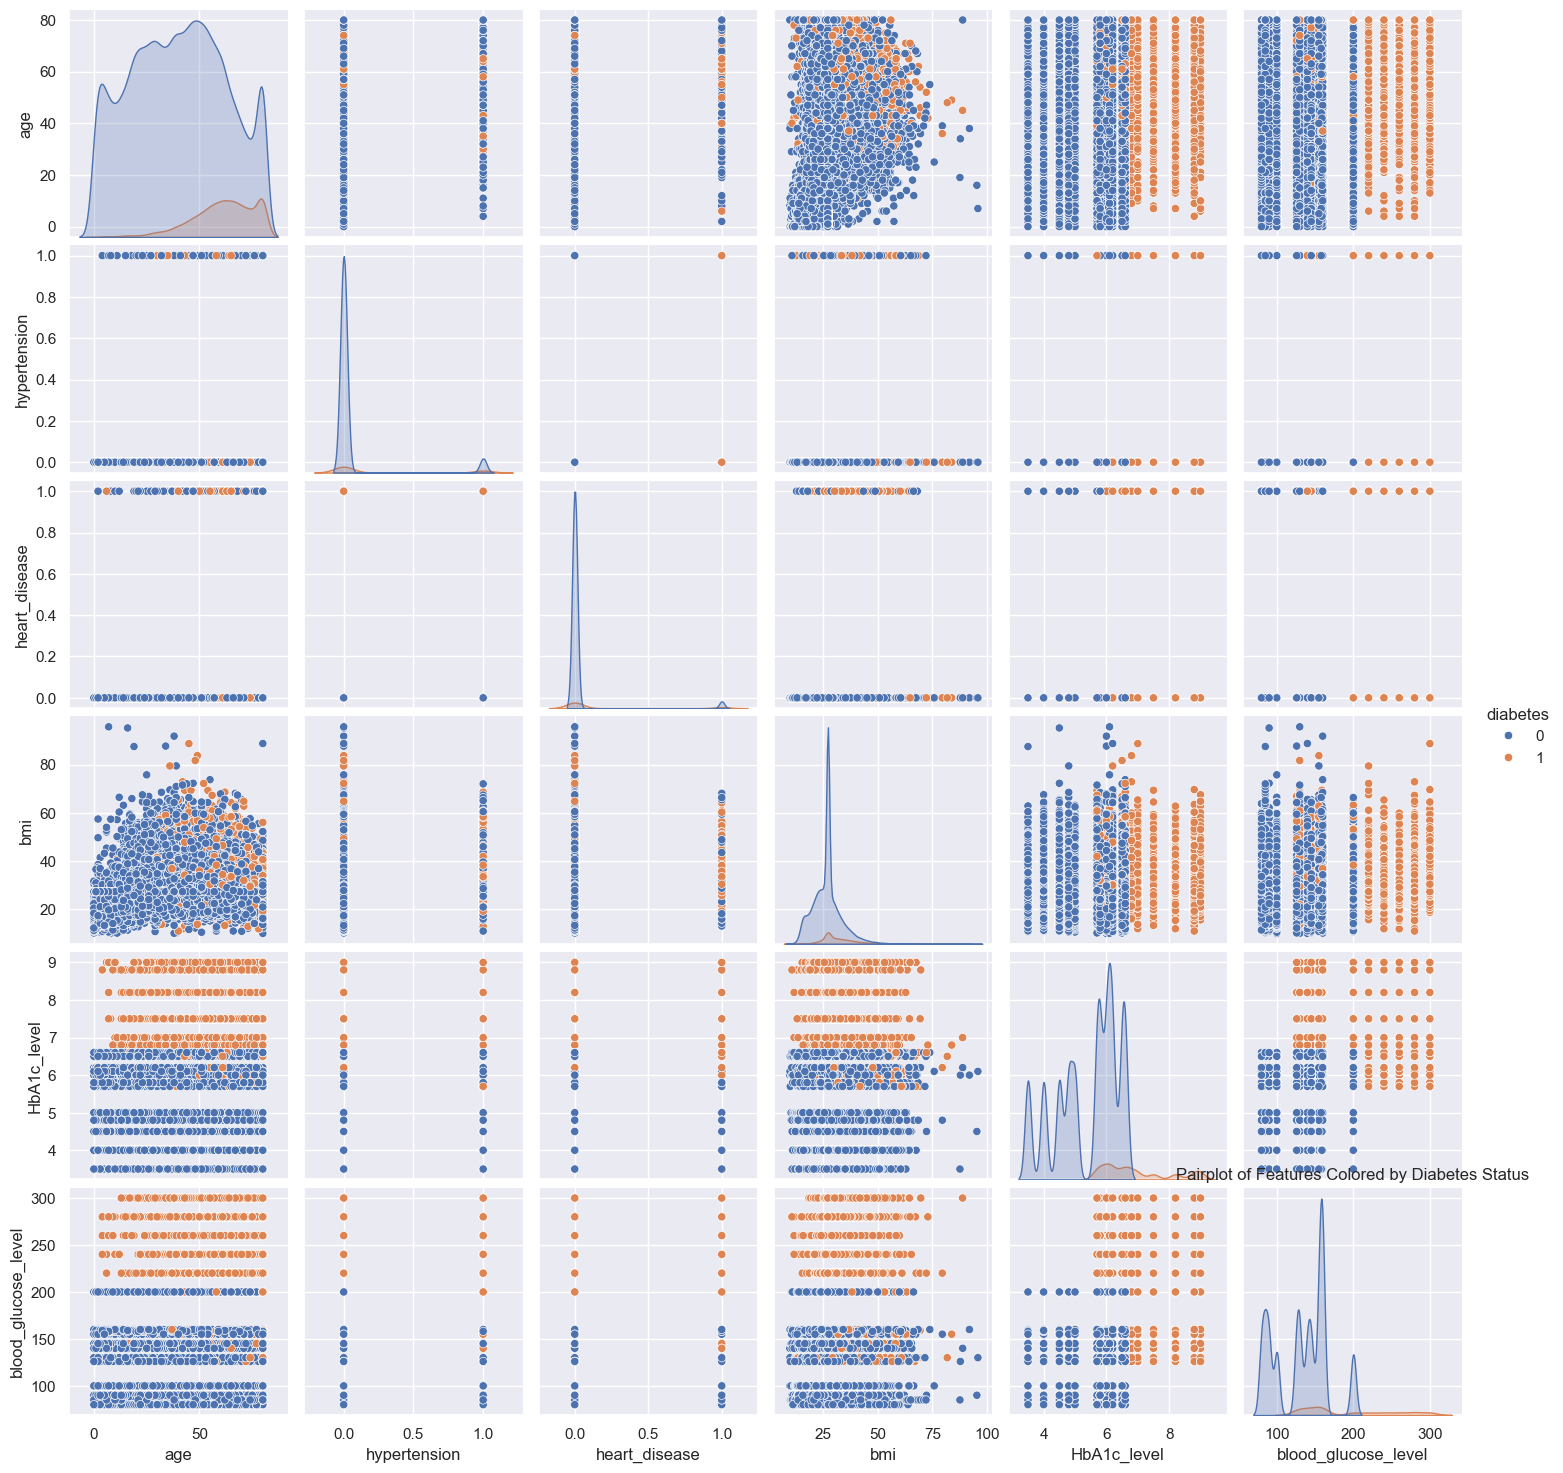

In [66]:
# Pairplot - Investigate the features relationship  with diabetes
sns.pairplot(df, hue='diabetes')
plt.title('Pairplot of Features Colored by Diabetes Status')
plt.show()

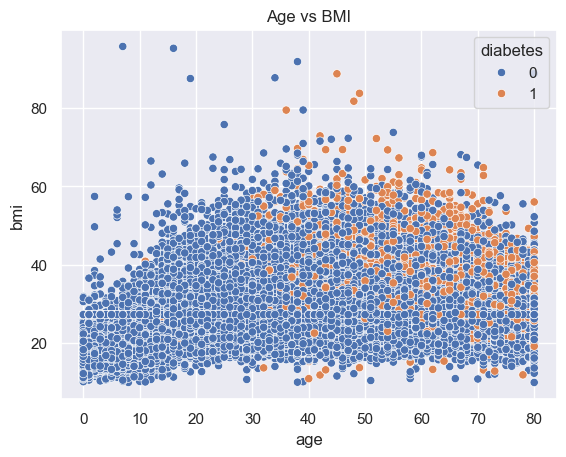

In [67]:
# Scatter plot to visualize relationship between age and BMI
sns.scatterplot(x='age', y='bmi', hue='diabetes', data=df)
plt.title('Age vs BMI')
plt.show()

Observation: This scatter plot illustrates the relationship between age and bmi among patients, with the presence of diabetes indicated by different colors. Each point represents an individual patient, where: X-axis displays the age of the patients while the Y-axis displays the 'bmi', a measure of body fat based on height and weight.

The color of the points differentiates patients with or without diabetes. The blue points indicates no diabetes (diabetes status (0)) while the orange color indicates those with diabetes (diabetes status (1)).

The plot shows a wide distribution of BMI across different ages, with a dense concentration of points from age 27 and above and at higher BMI values.
This may suggest a correlation between higher BMI and the presence of diabetes. at various age but more prevalent at certain BMI ranges.

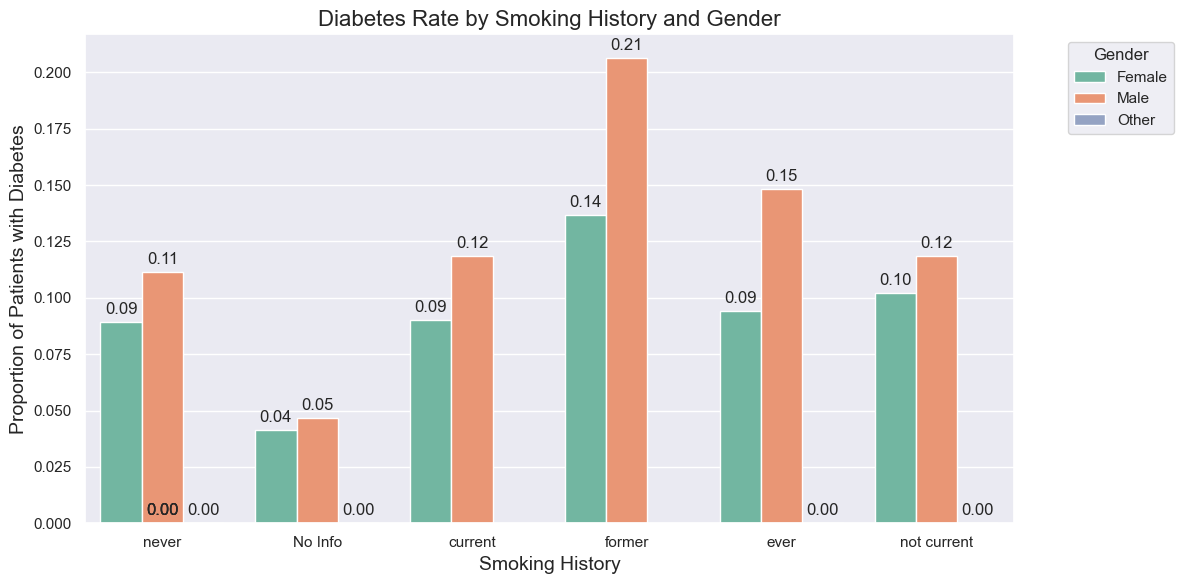

In [69]:
#Investigating Diabetes Rate by Smoking History and Gender

plt.figure(figsize=(12, 6)) 
ax = sns.barplot(x="smoking_history", y="diabetes", data=df, hue="gender", ci=None, palette="Set2") 
plt.title("Diabetes Rate by Smoking History and Gender", fontsize=16) 
plt.xlabel("Smoking History", fontsize=14) 
plt.ylabel("Proportion of Patients with Diabetes", fontsize=14) 
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add values on the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.tight_layout() 
plt.show()

The bars illustrates the size of patients with diabetes within each smoking history category. While different colors distinguish between gender groups: Female (green), Male (orange), and Other (blue).

The height of each bar indicates the proportion of patients with diabetes in that particular smoking history category and gender group. For instance, among males who are former smokers, approximately 21% have diabetes. Red Line and Dots:

The x-axis labels represent different categories of smoking history: never, No Info, current, former, ever, not current.

This helps you compare how diabetes prevalence differs among people with different smoking habits.

Observation: The highest diabetes rate (21%) is observed among males who are former smokers. The none smokers have a lower diabetes risk of 11% with males risk of diabetes slightly above the females.

The chart shows that smoking history has a noticeable impact on diabetes prevalence, with some categories showing higher risk level than others.

## Part C: Feature engineering

### Data preprocessing - Dealing with outliers

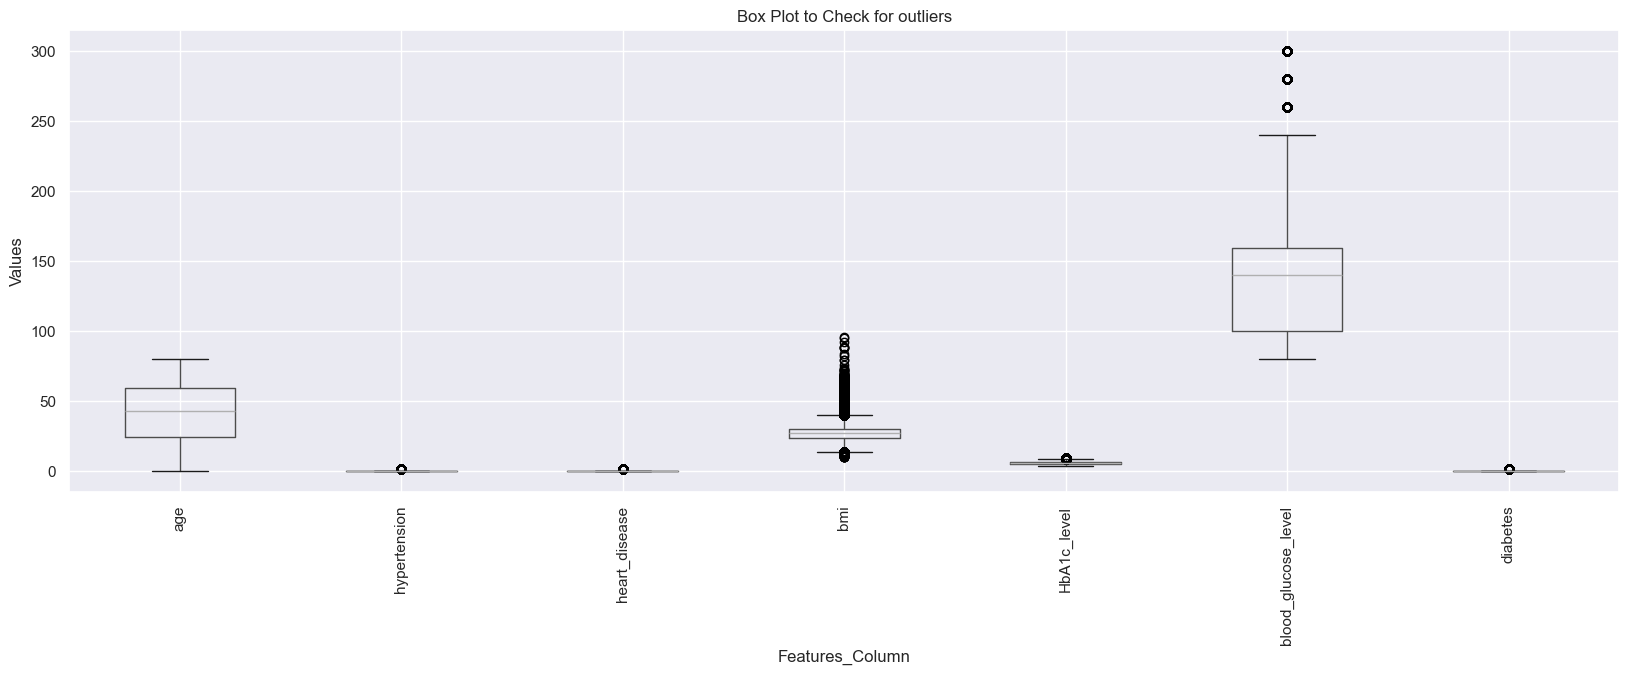

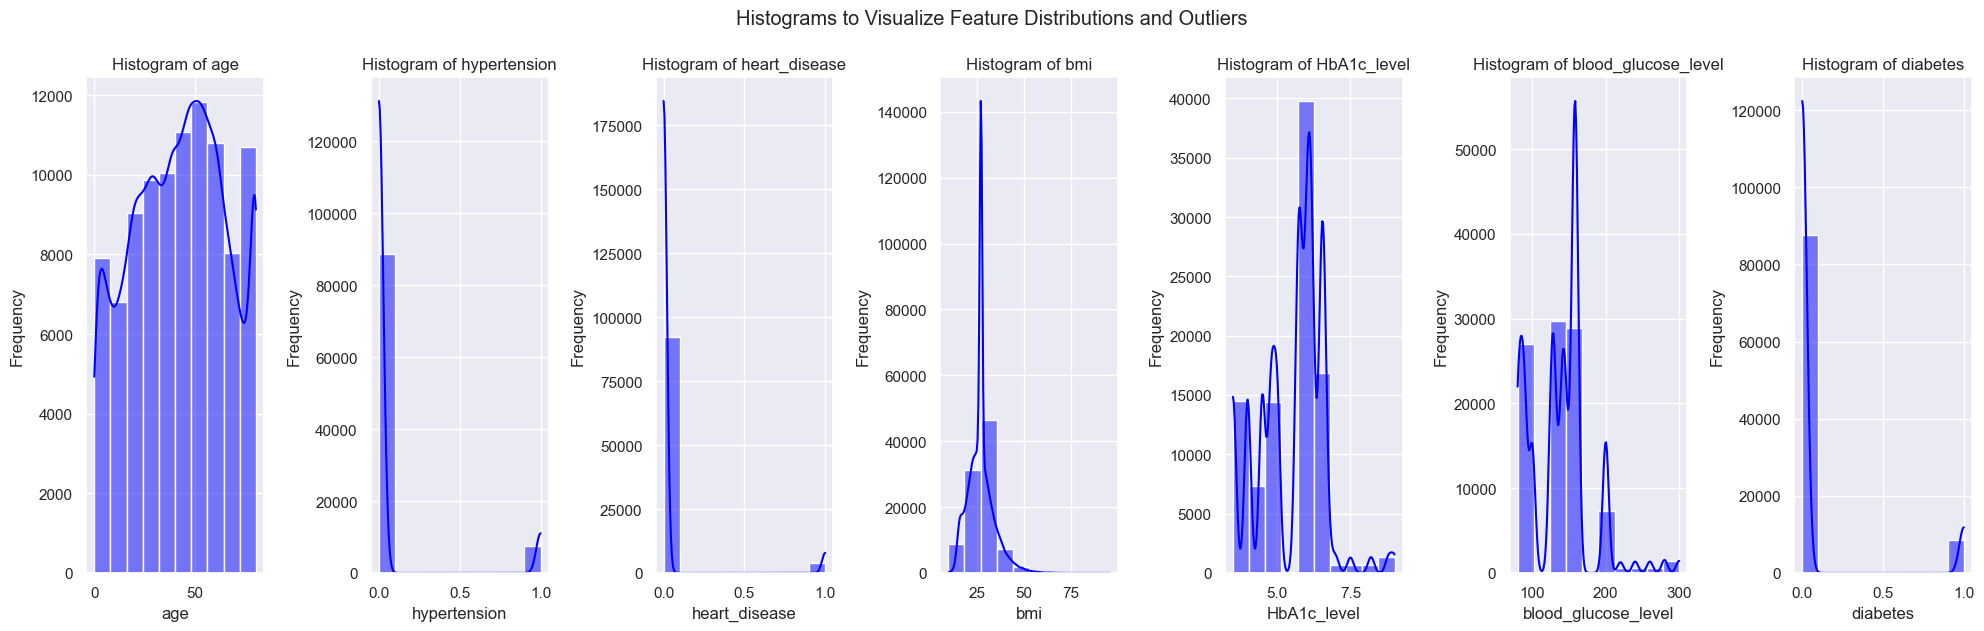

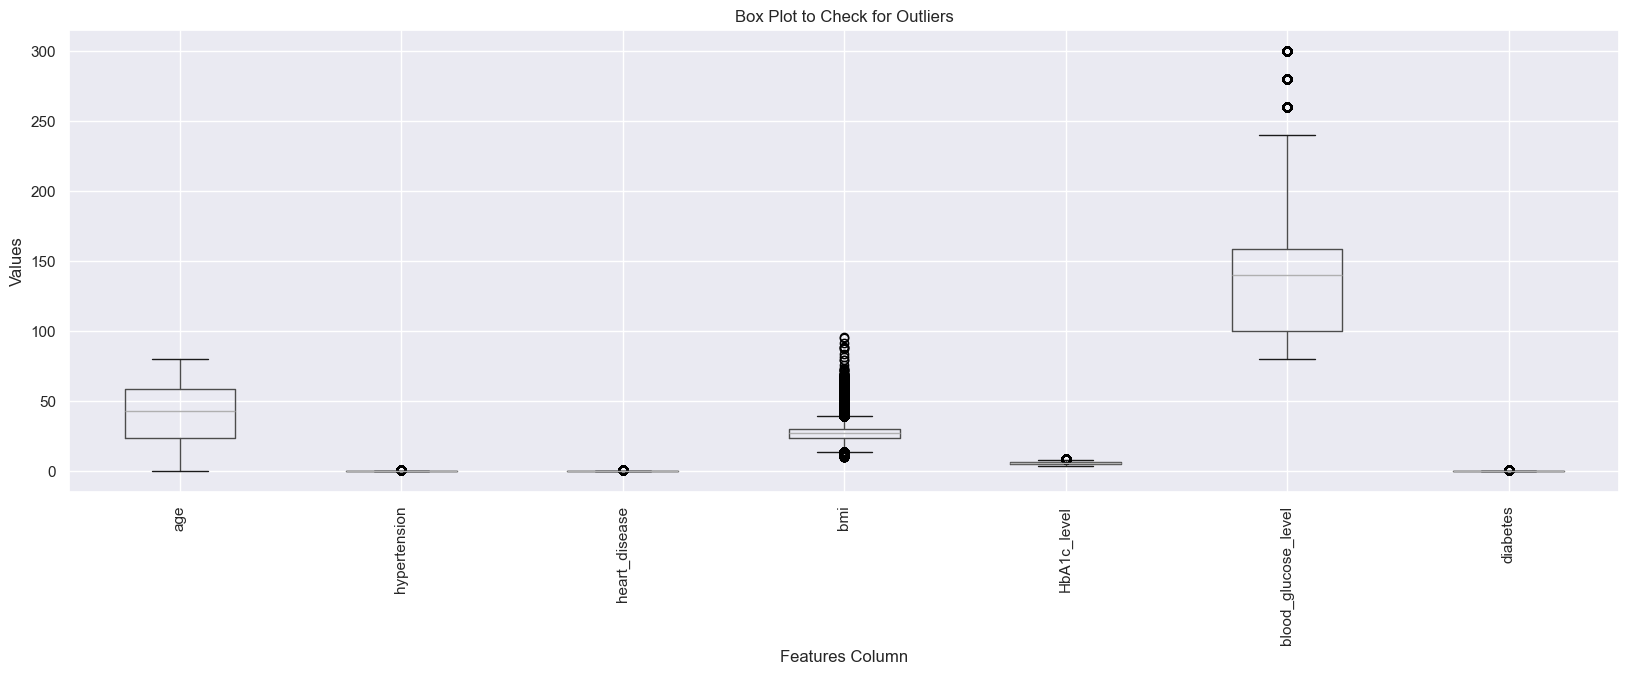

Count of Outliers for Each Feature:
age: 0 outliers
hypertension: 7461 outliers
heart_disease: 3923 outliers
bmi: 5354 outliers
HbA1c_level: 1312 outliers
blood_glucose_level: 2031 outliers
diabetes: 8482 outliers


In [76]:
#Creating Boxplot to visualise outliers
plt.figure(figsize=(20,6))
df.boxplot()
plt.title('Box Plot to Check for outliers')
plt.xticks(rotation=90)
plt.xlabel('Features_Column')
plt.ylabel('Values')
plt.show()

#Recall numerical columns are denoted by numerical_cols
#Create histograms for each numerical feature

plt.figure(figsize=(20, 6))  # Set the figure size
for i, feature in enumerate(numerical_cols):
    plt.subplot(1, len(numerical_cols), i + 1)  # Create subplots in one row
    sns.histplot(df[feature], bins=10, kde=True, color='blue')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.suptitle('Histograms to Visualize Feature Distributions and Outliers', y=1.05)
plt.show()

# Create a function to calculate outliers
def count_outliers(data):
    outlier_counts = {}
    for column in data.select_dtypes(include='number').columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_count = ((data[column] < lower_bound) | (data[column] > upper_bound)).sum()
        outlier_counts[column] = outlier_count
    return outlier_counts

# Creating Boxplot to visualize outliers
plt.figure(figsize=(20, 6))
df.boxplot()
plt.title('Box Plot to Check for Outliers')
plt.xticks(rotation=90)
plt.xlabel('Features Column')
plt.ylabel('Values')
plt.show()

# Count and print the outliers
outliers = count_outliers(df)
print("Count of Outliers for Each Feature:")
for feature, count in outliers.items():
    print(f"{feature}: {count} outliers")

The interquartile range (IQR) was used to check for the presence of outliers.

Observation: From the boxplot above and the IQR, there were many outliers present in the data. These were seen in hypertension, heart disease, HbA1c level and blood glucose level. Removing these may cause missing important part of the data analysis. Thus, these outliers will be scaled to preserve the integrity of the data. 

### Data Preparation for further analysis

In [80]:
# Specify the target and feature columns

# List of columns to drop
columns_to_drop = ['age_group', 'bmi_category', 'HbA1c_category']

# Separate features (X) and target (y)
df1 = df.drop(columns=columns_to_drop + ['diabetes'])
y = df['diabetes']

#Display the head
df1.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,Female,80,0,1,never,25.19,6.6,140
1,Female,54,0,0,No Info,27.32,6.6,80
2,Male,28,0,0,never,27.32,5.7,158
3,Female,36,0,0,current,23.45,5.0,155
4,Male,76,1,1,current,20.14,4.8,155


### Step 1: Encoding categorical variables and Scaling the data
Encoding categorical columns in machine learning is necessary. Machines do not understand categorical data but rather numerical data. Therefore, the need to transform categorical data in a way to preserve information and to make predictions based on the original categories.

In [83]:
#_Apply LabelEncoder to categorical columns
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for i in range(0,df1.shape[1]):
    if df1.dtypes[i]=='object':
        df1[df1.columns[i]] = le.fit_transform(df1[df1.columns[i]])

df1.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,80,0,1,4,25.19,6.6,140
1,0,54,0,0,0,27.32,6.6,80
2,1,28,0,0,4,27.32,5.7,158
3,0,36,0,0,1,23.45,5.0,155
4,1,76,1,1,1,20.14,4.8,155


### Data Scaling
Scaling is an important preprocessing step that transforms features to a similar range,  for many machine learning algorithms.
StandardScaler is a widely used scaling technique that standardizes features, transforming the data to have a mean of 0 and a standard deviation of 1.

In [146]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df1, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display results
print("Original training data shape:", X_train.shape)
print("Scaled training data shape:", X_train_scaled.shape)

Original training data shape: (76916, 8)
Scaled training data shape: (76916, 8)


## Part D: Machine learning: Model Selection, Training , and Validation
1) Train and test at least 3 supervised learning models:

In this project, the supervised learning models vis-a-viz the logistic regression, random forest and support vector machine were used. As a classification task, that requires proper classification and prediction of complex task like diabetes status, these models have been proven to work effectively on complex task like predictions resulting to best model of best results.

In [148]:
from collections import Counter
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, classification_report
)

# Model Selection

# Model definitions

classifiers = [
    [LogisticRegression(), 'Logistic Regression'],
    [RandomForestClassifier(random_state=42), 'Random Forest'],
    [SVC(probability=True), 'Support Vector Machine']
]

In [155]:
# Model Training

# Initialize a list to store results
results = []

# Function to evaluate models and store results for data
for classifier in classifiers:
    model = classifier[0]
    model_name = classifier[1]
    
    # Fit the model
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = model.predict(X_test_scaled)
        
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])

    # Store results in a dictionary for the current model
    result = {
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc
    }
    
    # Append the result dictionary to the results list
    results.append(result)

    print(' ')

# Print the results after evaluating all models
print("Results:")
for res in results:
    print(res)

 
 
 
Results:
{'Model': 'Logistic Regression', 'Accuracy': 0.9569422776911076, 'Precision': 0.8546465448768864, 'Recall': 0.6252178965717606, 'F1 Score': 0.7221476510067114, 'ROC AUC': 0.9620501470995791}
{'Model': 'Random Forest', 'Accuracy': 0.9686427457098284, 'Precision': 0.9436507936507936, 'Recall': 0.6908773968622893, 'F1 Score': 0.7977188862797719, 'ROC AUC': 0.9621833399932546}
{'Model': 'Support Vector Machine', 'Accuracy': 0.9611024440977639, 'Precision': 0.9783677482792527, 'Recall': 0.5781522370714701, 'F1 Score': 0.7268078889700511, 'ROC AUC': 0.9314846097743573}


## Part E: 5. Model Evaluation
a) Analyze the results of your trained models

In [161]:
# Create a DataFrame from the results
df_results = pd.DataFrame(results)

# Display the DataFrame
df_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Logistic Regression,0.956942,0.854647,0.625218,0.722148,0.962050
1,Random Forest,0.968643,0.943651,0.690877,0.797719,0.962183
2,Support Vector Machine,0.961102,0.978368,0.578152,0.726808,0.931485


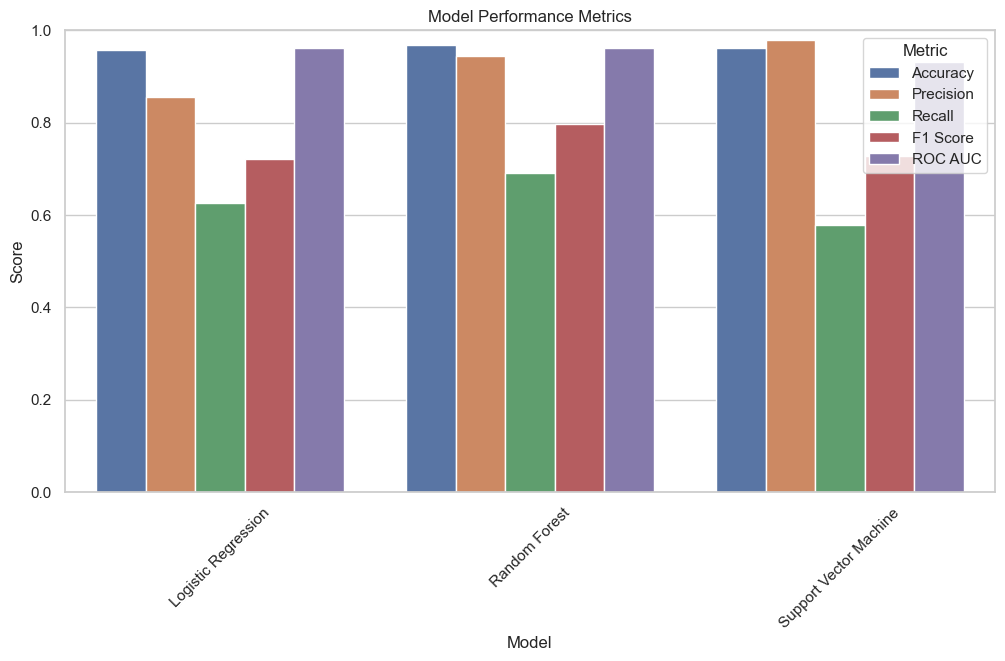

In [170]:
#Visualize the model

# Set the style of seaborn
sns.set(style='whitegrid')

# Melt the DataFrame to make it suitable for seaborn
df_melted = df_results.melt(id_vars='Model', var_name='Metric', value_name='Value')

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x='Model', y='Value', hue='Metric')
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.xlabel('Model')
plt.legend(title='Metric')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

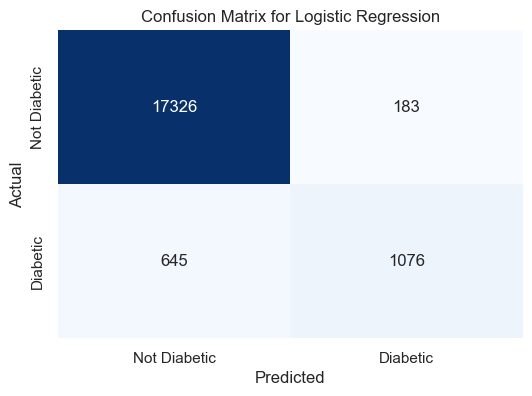

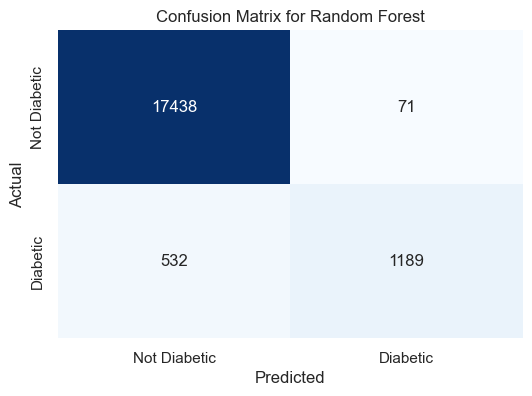

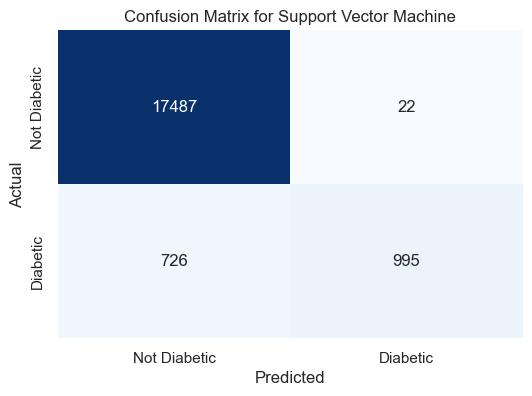

In [169]:
from sklearn.metrics import confusion_matrix

# Initialize a list to hold the confusion matrices
confusion_matrices = {}

# Loop through each classifier
for classifier in classifiers:
    model = classifier[0]
    model_name = classifier[1]
    
    # Fit the model and make predictions
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices[model_name] = cm

# Function to plot the confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Not Diabetic', 'Diabetic'],
                yticklabels=['Not Diabetic', 'Diabetic'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrices for each model
for model_name, cm in confusion_matrices.items():
    plot_confusion_matrix(cm, model_name)

From the trained models—Logistic Regression, Random Forest, and Support Vector Machine (SVM)—the Random Forest achieved the highest accuracy at 96.86%. The SVM excelled in precision with a score of 97.8%, while the Random Forest also recorded the highest recall and F1-score at 68% and 79.77%, respectively. Additionally, the SVM had the best ROC AUC at 95%.

**Model Analysis**

Considering the most important metrics in the medical field, where accuracy and timely intervention are critical, the best model is the Support Vector Machine (SVM). This is primarily due to its low rate of false negatives, which is essential for the early intervention of patients at risk of developing diabetes. The SVM's high recall makes it particularly well-suited for early detection, aligning perfectly with the project's goal.

### Most important metrics for the project

The importance of metrics can vary based on the specific goals of the analysis. In this project, the primary objective is to predict the likelihood of diabetes onset, facilitating timely and targeted preventive measures. The key metrics to achieve this include recall, precision, F1 score, and, importantly, the confusion matrix.

Rationale Behind the Metrics
- Recall (Sensitivity): This metric is crucial as it measures the proportion of actual positive cases (e.g., people with diabetes) that the model correctly identifies. In medical contexts, failing to detect a true positive (a diabetic patient) can have serious consequences, making recall a critical focus.
- Precision: Precision assesses the proportion of positive identifications that are accurate. High precision is essential to minimize false positives, which can lead to unnecessary anxiety, additional testing, or treatments for patients incorrectly identified as having diabetes.
- F1 Score: While it is relatively important, the F1 score provides a harmonic balance between precision and recall. It is particularly useful when a single metric is needed to reflect both aspects, especially in imbalanced datasets, such as those involving diabetes, where one class may be more prevalent than the other.
 
Accuracy can be misleading in imbalanced datasets, which are common in medical diagnoses. This occurs because a model may achieve high accuracy by predominantly predicting the majority class while failing to identify the minority class effectively.

In [173]:
#Make prediction and compare with the actual values

# Create a DataFrame to compare actual and predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Display the comparison DataFrame
print(comparison_df)

       Actual  Predicted
2547        0          0
34774       0          0
71084       1          1
50584       0          0
80788       0          0
...       ...        ...
19314       0          0
17624       0          0
8673        0          0
37062       0          0
21353       0          0

[19230 rows x 2 columns]


### Concerns for business if any for better result

In the medical field, there is a critical need to focus on minimizing false negatives and maximizing true positives due to the severe implications of misdiagnoses. Incorrect diagnoses can jeopardize lives and livelihoods, especially when legal actions are involved. Early diagnosis is essential for timely intervention, and this is where the confusion matrix plays a significant role.

The confusion matrix is a vital tool for evaluating the performance of classification models, particularly in medical diagnoses such as diabetes prediction. It offers a detailed breakdown of the model's predictions, allowing for the assessment of true positives, true negatives, false positives, and false negatives.

Components of a Confusion Matrix
In binary classification problems, like predicting diabetes, the confusion matrix consists of four key components:

True Positives (TP): The number of correctly predicted positive cases (diabetics correctly identified).
True Negatives (TN): The number of correctly predicted negative cases (non-diabetics correctly identified).
False Positives (FP): The number of incorrectly predicted positive cases (non-diabetics identified as diabetics).
False Negatives (FN): The number of incorrectly predicted negative cases (diabetics identified as non-diabetics).
The confusion matrix provides crucial insights into a model's performance by detailing its ability to identify both positive and negative cases. This granularity is especially important in medical contexts.

Among the key concerns in medical diagnoses, failing to identify diabetic patients (false negatives) is the most critical. Such oversights can lead to serious health consequences due to a lack of necessary treatment. While less critical than false negatives, false positives are also significant as they can cause unnecessary anxiety, lead to additional testing, and result in potential overtreatment. Both types of errors are major concerns for the medical community.

Conclusion

In the context of medical diagnosis, the confusion matrix is invaluable for understanding model performance, especially regarding false negatives and false positives.

Key Concerns

Prioritize Recall: Identifying true positive cases (diabetics) is crucial to prevent health complications, making recall a top priority.
Monitor Precision: It’s important to consider precision as well, ensuring that identified cases are accurate to avoid unnecessary treatments or anxiety.
Overall, the confusion matrix offers a comprehensive view of model performance, enabling clinicians to make informed decisions based on the strengths and weaknesses of the model.